# Case 4 - Millenium bcp

### This notebook uses the *Case4_UNL-IMS - Data - delivery v2.xlsx* dataset

Master Degree Program in Data Science and Advanced Analytics

**Group C** </br>
Alina Metzger 20230998</br>
Carolina Caldeira 20230440</br>
Gonçalo Caldeirinha 20230469</br>
Madalena Figueirinhas 20230436</br>
Martyna Kmiecik 20230452</br>

# 1. Import the needed libraries

In [1]:
# Geral
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import re
import random
import os
from joblib import Parallel, delayed
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
    OrdinalEncoder,
    RobustScaler,
    LabelEncoder,
)
from category_encoders import BinaryEncoder
import os

from sklearn.feature_selection import (
    RFE,
    SelectKBest,
    chi2,
    f_regression,
    SelectFromModel,
    mutual_info_classif,
)
from sklearn.model_selection import (
    train_test_split,
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    ShuffleSplit,
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LassoCV,
    RidgeCV,
    Ridge,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
from scipy.stats import chi2_contingency
from category_encoders import BinaryEncoder
from joblib import Parallel, delayed
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
sns.set(style="whitegrid")

subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

# 2. Import data

### option 1

In [3]:
# load data from the excel file: Task execution sheet and store it as 'task_execution_data'
task_execution_data = pd.read_csv('Q1.csv',header=0, delimiter = ';')
# check the first 5 rows
task_execution_data.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638,569,Initial Request,Submit initial request,270
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,NaN,273
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,#N/D,Execution,NaN,273
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,Task executed with success,282
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,Request accepted by requester,299


In [4]:
# load data from the excel file: User information sheet and store it as 'user_data'
user_data = pd.read_csv('Q2.csv',header=0, delimiter = ';')
# check the first 5 rows
user_data.head()

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1872,F,1988,1,Yes,2024,N
1,11133,F,1975,1,Yes,2019,N
2,10332,F,1978,2,Yes,2019,N
3,10349,F,1976,3,Yes,2024,N
4,1394,F,1984,4,Yes,2021,N


In [5]:
# load data from the excel file: Specific request data sheet and store it as 'request_data'
request_data = pd.read_csv('Q3.csv',header=0, delimiter = ';')
# check the first 5 rows
request_data.head()

,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0


In [6]:
# load data from the excel file: Rejections sheet and store it as 'rejections_data'
rejections_data = pd.read_csv('Q4.csv',header=0, delimiter = ';')
# check the first 5 rows
rejections_data.head()

,Task Id,idBPMRequirement
0,1606251,191
1,1606786,183
2,1629944,183
3,1643257,183
4,1643929,183


In [7]:
task_execution_data.replace('#N/D', np.nan, inplace=True)
user_data.replace('#N/D', np.nan, inplace=True)
request_data.replace('#N/D', np.nan, inplace=True)
rejections_data.replace('#N/D', np.nan, inplace=True)

### option 2

In [8]:
# # load data from the excel file: Task execution sheet and store it as 'task_execution_data'
# task_execution_data = pd.read_excel('Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name='Q1 - Task execution data', header=0)
# # check the first 5 rows
# task_execution_data.head()

In [9]:
# # load data from the excel file: User information sheet and store it as 'user_data'
# user_data = pd.read_excel('Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name='Q2 - User information', header=0)
# # check the first 5 rows
# user_data.head()

In [10]:
# # load data from the excel file: Specific request data sheet and store it as 'request_data'
# request_data = pd.read_excel('Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name='Q3 - Specific request data', header=0)
# # check the first 5 rows
# request_data.head()

In [11]:
# # load data from the excel file: Rejections sheet and store it as 'rejections_data'
# rejections_data = pd.read_excel('Case4_UNL-IMS - Data - delivery v2.xlsx', sheet_name='Q4 - Rejections', header=0)
# # check the first 5 rows
# rejections_data.head()

In [12]:
# make a copy of the respective datasets to preserve the original data
task_execution_original = task_execution_data.copy()
user_original = user_data.copy()
request_original = request_data.copy()
rejections_original = rejections_data.copy()

# 3.Data Exploration

## 3.1 User Data

In [13]:
# check client data information
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Task Executer  11370 non-null  int64 
 1   Sex            11370 non-null  object
 2   BirthYear      11370 non-null  int64 
 3   Role ID        11370 non-null  int64 
 4   Is Manager     11370 non-null  object
 5   OrgUnitSince   11370 non-null  int64 
 6   IsOutSourcer   11370 non-null  object
dtypes: int64(4), object(3)
memory usage: 621.9+ KB


In [14]:
# calculate the number of missing values in each column of the dataframe
user_data.isna().sum()

Task Executer    0
Sex              0
BirthYear        0
Role ID          0
Is Manager       0
OrgUnitSince     0
IsOutSourcer     0
dtype: int64

In [15]:
# check for duplicate rows in the dataframe
user_data.duplicated().value_counts()

False    11346
True        24
Name: count, dtype: int64

In [16]:
# identify and display duplicate rows in the user_data
user_data[user_data.duplicated()]

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
1653,1135,M,1960,55,Yes,2016,N
1769,1497,F,1961,55,Yes,2017,N
4610,1135,M,1960,55,Yes,2016,N
6200,1427,M,1964,56,Yes,2014,N
6201,1526,M,1963,55,Yes,2016,N
6749,1532,M,1956,55,Yes,2016,N
7457,6978,M,1959,58,Yes,2016,N
7524,1427,M,1964,80,Yes,2016,N
7525,1595,M,1960,55,Yes,2017,N
7526,1593,M,1957,55,Yes,2017,N


In [17]:
# display the rows where 'Task Executer' column has values of 0
user_data[user_data['Task Executer']==0]

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer


In [18]:
# remove duplicate rows from the dataframe
user_data = user_data.drop_duplicates()

In [19]:
# show the summary statistics for all variables
user_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Task Executer,11346.0,NaN,NaN,NaN,5690.571215,3281.735236,1.0,2853.25,5689.5,8533.75,11370.0
Sex,11346,4,M,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BirthYear,11346.0,NaN,NaN,NaN,1976.040719,15.475747,1901.0,1967.0,1975.0,1987.0,2050.0
Role ID,11346.0,NaN,NaN,NaN,17.585581,14.665699,1.0,8.0,21.0,21.0,123.0
Is Manager,11346,2,Yes,7266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrgUnitSince,11346.0,NaN,NaN,NaN,2020.255244,4.393681,1966.0,2019.0,2022.0,2023.0,2024.0
IsOutSourcer,11346,2,N,7266,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# check the number of unique values in the 'Task Executer' column
user_data['Task Executer'].nunique()

11274

In [21]:
# identify the rows that have duplicate values in the 'Task Executer' column
# sort it by the 'Task Executer' column to organize the duplicates
user_data[user_data.duplicated(subset=['Task Executer'], keep=False)].sort_values(by='Task Executer')

# conclusions:
# as we can see some of the employers probably got promoted
# that is why their Role ID changes as well as OrgUnitSince as they change department
# for some (ex: Executer 1135 has different OrgUnitSince even tho he has the same Role ID)

,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
9919,765,M,1982,65,Yes,2016,N
10031,765,M,1982,45,Yes,2020,N
9605,1135,M,1960,55,Yes,2017,N
1638,1135,M,1960,55,Yes,2016,N
11143,1337,M,1957,56,Yes,2018,N
...,...,...,...,...,...,...,...
5432,10882,F,1966,55,Yes,2018,N
1134,10882,F,1966,56,Yes,2018,N
232,10882,F,1966,39,Yes,2018,N
5558,11274,F,1962,14,Yes,2008,N


In [22]:
# treat cases with all the columns equal, except for OrgUnitSince

# define the columns to check for duplicates
columns_to_check = ['Task Executer', 'Sex', 'BirthYear', 'Role ID', 'Is Manager', 'IsOutSourcer']
# identify the rows that have duplicates related to the specified columns
# sort it by 'Task Executer'
duplicates = user_data[user_data.duplicated(subset=columns_to_check, keep=False)].sort_values(by='Task Executer')
# display the duplicated rows found and their number
print(f'Number of duplicated rows: {len(duplicates)}')
duplicates

Number of duplicated rows: 19


,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
1638,1135,M,1960,55,Yes,2016,N
9605,1135,M,1960,55,Yes,2017,N
4699,1341,M,1966,95,Yes,2012,N
4702,1341,M,1966,95,Yes,2013,N
1636,1427,M,1964,56,Yes,2014,N
9715,1427,M,1964,56,Yes,2016,N
11016,1755,M,1983,16,Yes,2020,N
6631,1755,M,1983,16,Yes,2018,N
1635,6907,M,1962,55,Yes,2016,N
7523,6907,M,1962,55,Yes,2011,N


In [23]:
# treat cases with all the columns equal, except for Role ID

# define the columns to check for duplicates
columns_to_check = ['Task Executer', 'Sex', 'BirthYear', 'OrgUnitSince', 'Is Manager', 'IsOutSourcer']
# identify the rows that have duplicates related to the specified columns
# sort it by 'Task Executer'
duplicates3 = user_data[user_data.duplicated(subset=columns_to_check, keep=False)].sort_values(by='Task Executer')
# display the duplicated rows found and their number
print(f'Number of duplicated rows: {len(duplicates3)}')
duplicates3

Number of duplicated rows: 44


,Task Executer,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
11143,1337,M,1957,56,Yes,2018,N
1417,1337,M,1957,75,Yes,2018,N
4699,1341,M,1966,95,Yes,2012,N
11144,1341,M,1966,38,Yes,2012,N
6750,1427,M,1964,80,Yes,2016,N
9715,1427,M,1964,56,Yes,2016,N
8508,1427,M,1964,55,Yes,2016,N
1000,1526,M,1963,56,Yes,2016,N
1637,1526,M,1963,55,Yes,2016,N
10018,1570,M,1971,107,Yes,2018,N


In [24]:
# check the number of unique values in the column 'Role ID'
user_data['Role ID'].nunique()

123

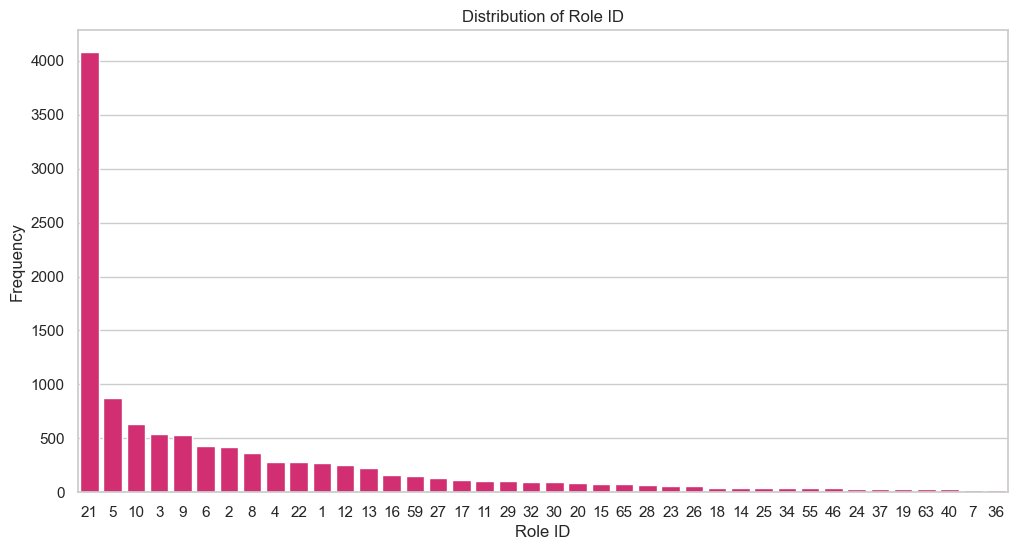

In [25]:
# Distribution of 'Role ID' variable - top 40

# get the top 40 most frequent 'Role ID' values
top_role_ids = user_data['Role ID'].value_counts().head(40).index

# filter the DataFrame to include only the rows where 'Role ID' is one of the top 40
filtered_user_data = user_data[user_data['Role ID'].isin(top_role_ids)]

# set the size of the plot
plt.figure(figsize=(12, 6))
# create a count plot for the 'Role ID' column in the filtered DataFrame and order it by frequency
sns.countplot(data=filtered_user_data, x='Role ID', order=filtered_user_data['Role ID'].value_counts().index, color='#ec146e')
# set the title
plt.title('Distribution of Role ID')
# set label for x-axis
plt.xlabel('Role ID')
# set label for y-axis
plt.ylabel('Frequency')
# display the plot
plt.show()

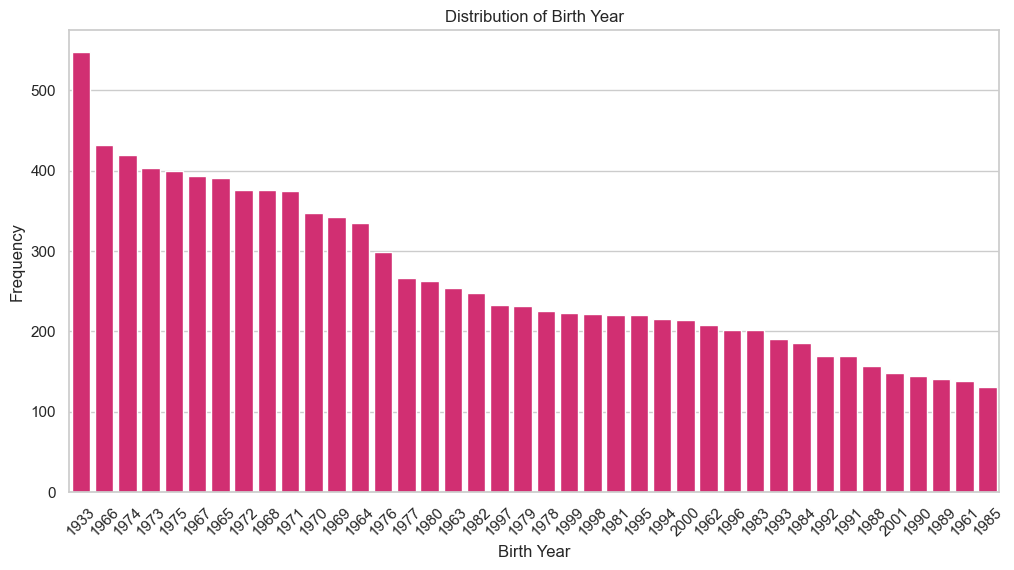

In [26]:
# Distribution of 'BirthYear' variable - top 40 

# get the top 40 most frequent 'BirthYear' values
top_role_ids = user_data['BirthYear'].value_counts().head(40).index
# filter the DataFrame to include only the rows where 'BirthYear' is one of the top 40
filtered_user_data = user_data[user_data['BirthYear'].isin(top_role_ids)]

# set the size of the plot
plt.figure(figsize=(12, 6))
# create a count plot for the 'BirthYear' column in the filtered DataFrame and order it by frequency
sns.countplot(data=filtered_user_data, x='BirthYear', order=filtered_user_data['BirthYear'].value_counts().index, color='#ec146e')
# set the title
plt.title('Distribution of Birth Year')
# set label for x-axis
plt.xlabel('Birth Year')
# set label for y-axis
plt.ylabel('Frequency')
# rotate x-axis labels -> better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

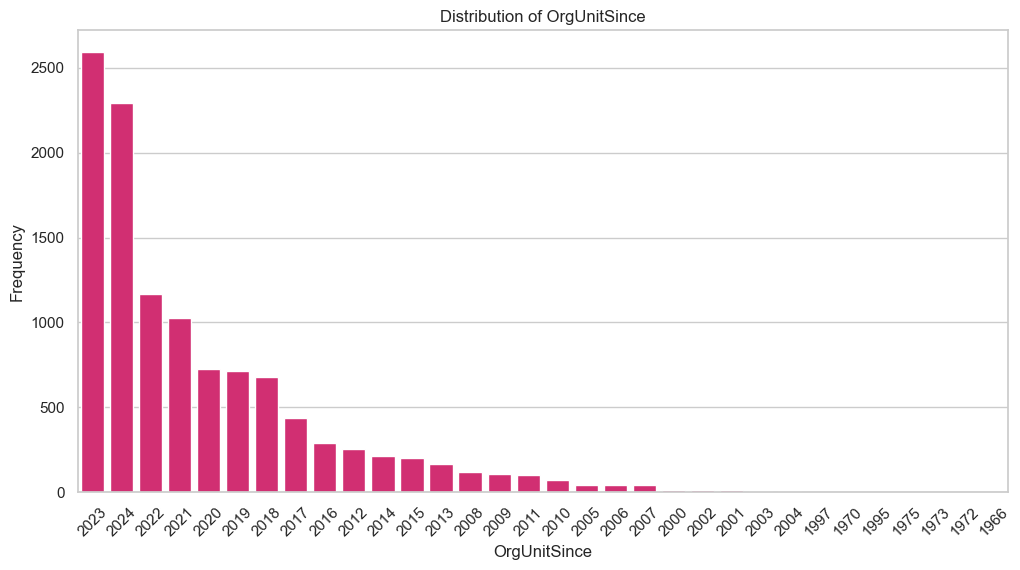

In [27]:
# Distribution of 'OrgUnitSince' variable

# set the size of the plot
plt.figure(figsize=(12, 6))
# create a count plot for the 'OrgUnitSince' column and order it by frequency
sns.countplot(data=user_data, x='OrgUnitSince', order=user_data['OrgUnitSince'].value_counts().index, color='#ec146e')
# set the title
plt.title('Distribution of OrgUnitSince')
# set label for x-axis
plt.xlabel('OrgUnitSince')
# set label for y-axis
plt.ylabel('Frequency')
# rotate x-axis labels -> better readability
plt.xticks(rotation=45)
# display the plot
plt.show()

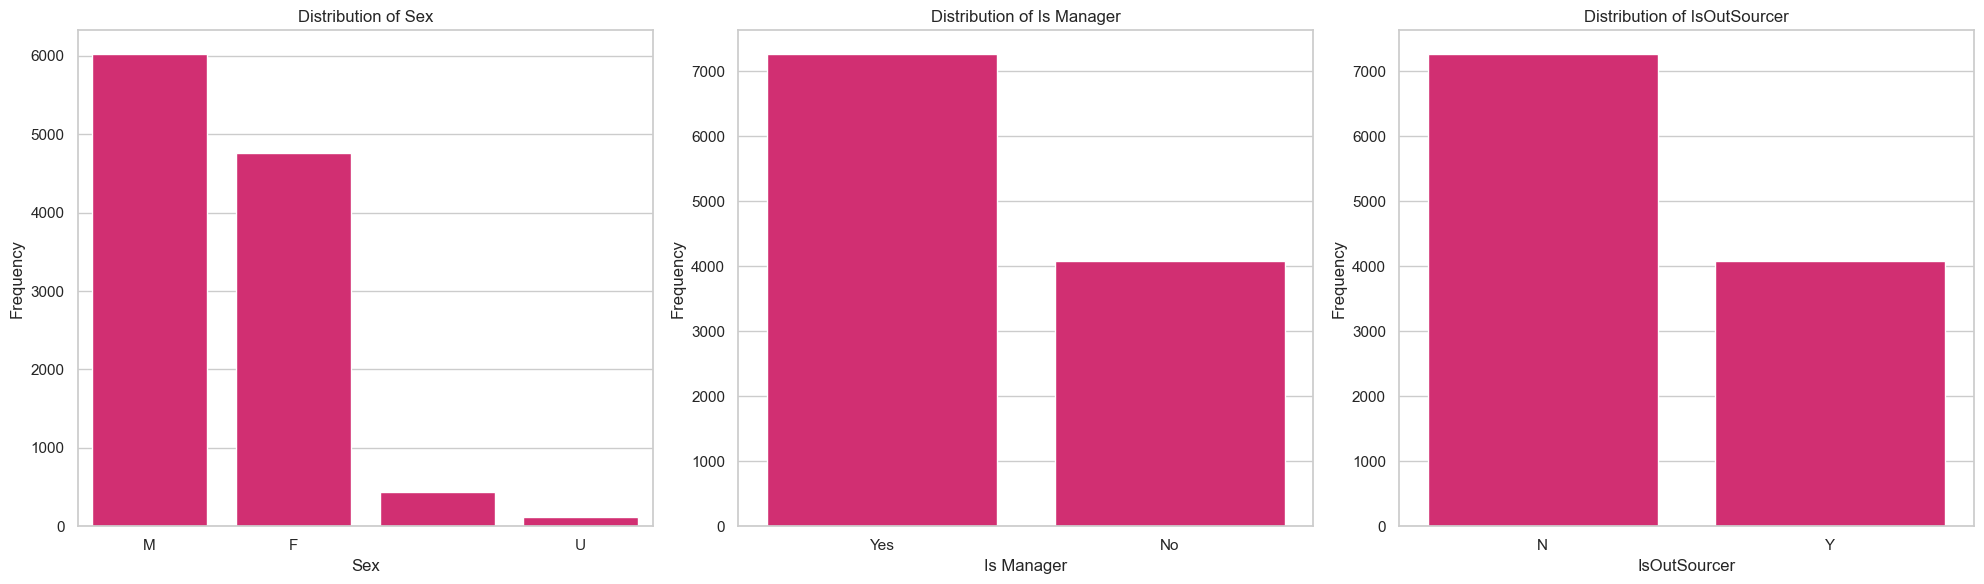

In [28]:
# create a figure with 1 rows and 3 columns and set its size
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Distribution of 'Sex' variable
# create a count plot for the 'Sex' column and order it by frequency
sns.countplot(data=user_data, x='Sex', order=user_data['Sex'].value_counts().index, color='#ec146e', ax=axes[0])
# set the title
axes[0].set_title('Distribution of Sex')
# set label for x-axis 
axes[0].set_xlabel('Sex')
# set label for y-axis
axes[0].set_ylabel('Frequency')

# Distribution of 'Is Manager' variable
# create a count plot for the 'Is Manager' column and order it by frequency
sns.countplot(data=user_data, x='Is Manager', order=user_data['Is Manager'].value_counts().index, color='#ec146e', ax=axes[1])
# set the title
axes[1].set_title('Distribution of Is Manager')
# set label for x-axis 
axes[1].set_xlabel('Is Manager')
# set label for y-axis
axes[1].set_ylabel('Frequency')

# Distribution of 'IsOutSourcer' variable
# create a count plot for the 'IsOutSourcer' column and order it by frequency
sns.countplot(data=user_data, x='IsOutSourcer', order=user_data['IsOutSourcer'].value_counts().index, color='#ec146e', ax=axes[2])
# set the title
axes[2].set_title('Distribution of IsOutSourcer')
# set label for x-axis 
axes[2].set_xlabel('IsOutSourcer')
# set label for y-axis
axes[2].set_ylabel('Frequency')

# adjust the layout of the subplots -> prevent overlap and ensure they fit in the figure
plt.tight_layout()
# display the plots
plt.show()

- The distribution shows varying frequencies of different user roles, birth years, genders etc. with some types being much more common than others. This indicates a diversity in users.

In [29]:
# check for the unique values in the 'Sex' column
user_data['Sex'].unique()

# missing values recorded as ' ' and 'U' -> robots

array(['F', 'M', ' ', 'U'], dtype=object)

In [30]:
#print(user_data['BirthYear'].unique(), user_data['OrgUnitSince'].unique(), user_data['Role ID'].unique())
#check for other hidden nans

## 3.2 Task Execution Data

In [31]:
# check tasks data information
task_execution_data.info()

# task predicted end date can be null 
# task Executer, Task executer department, Action - why nulls?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Task Id                   209017 non-null  int64 
 1   Request Identifier        209017 non-null  int64 
 2   Task arrival date         209017 non-null  object
 3   Task capture date         209017 non-null  object
 4   Task execution end date   209017 non-null  object
 5   Task predicted end date   163232 non-null  object
 6   Actvity ID                209017 non-null  int64 
 7   Task Executer             188888 non-null  object
 8   Task executer department  181887 non-null  object
 9   Task Type                 209017 non-null  object
 10  Action                    124576 non-null  object
 11  idBPMApplicationAction    209017 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 19.1+ MB


In [32]:
# calculate the number of missing values in each column
task_execution_data.isna().sum()

Task Id                         0
Request Identifier              0
Task arrival date               0
Task capture date               0
Task execution end date         0
Task predicted end date     45785
Actvity ID                      0
Task Executer               20129
Task executer department    27130
Task Type                       0
Action                      84441
idBPMApplicationAction          0
dtype: int64

In [33]:
# display the rows where 'Task executer department' column has values of 0
task_execution_data[task_execution_data['Task executer department'] == 0]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction


In [34]:
# check for duplicate rows
task_execution_data.duplicated().value_counts()

False    209017
Name: count, dtype: int64

In [35]:
# check for duplicate values in the column 'Activity ID' 
task_execution_data.duplicated(subset='Actvity ID').value_counts()

True     209008
False         9
Name: count, dtype: int64

In [36]:
# check for duplicate values in the column 'Task Id'  
task_execution_data.duplicated(subset='Task Id').value_counts()

False    209017
Name: count, dtype: int64

In [37]:
# set 'Task Id' as the index
# task_execution_data = task_execution_data.set_index('Task Id')

In [38]:
# show the summary statistics for all variables
task_execution_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Task Id,209017.0,NaN,NaN,NaN,3399026.060316,1232948.437566,1584303.0,2337169.0,3200924.0,4154313.0,6863412.0
Request Identifier,209017.0,NaN,NaN,NaN,23375.79439,13487.308735,1.0,11670.0,23325.0,35564.0,45772.0
Task arrival date,209017,208936,2023-10-16 16:42:00.000,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task capture date,209017,202364,2023-12-06 10:58:00.000,4100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task execution end date,209017,189229,2023-12-06 10:58:00.000,10598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task predicted end date,163232,148867,2024-01-10 14:27:00.313,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actvity ID,209017.0,NaN,NaN,NaN,102.76211,2.115501,100.0,102.0,102.0,104.0,108.0
Task Executer,188888,1648,10606,32987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task executer department,181887,391,1146,27393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Task Type,209017,4,Execution,134815,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# calculate the number of unique vales in the column 'Task Executer'
task_execution_data['Task Executer'].nunique()

# in user data -> 11274 tasks executers (unique) -> many of them do not perform tasks

1648

In [40]:
# calculate the number of unique vales in the column 'Task executer department'
task_execution_data['Task executer department'].nunique()

391

In [41]:
# count the occurrences of each unique value in the 'Actvity ID' column
task_execution_data['Actvity ID'].value_counts()

Actvity ID
102    55755
104    46064
100    45772
103    31163
107    24688
101     3742
105      957
108      737
106      139
Name: count, dtype: int64

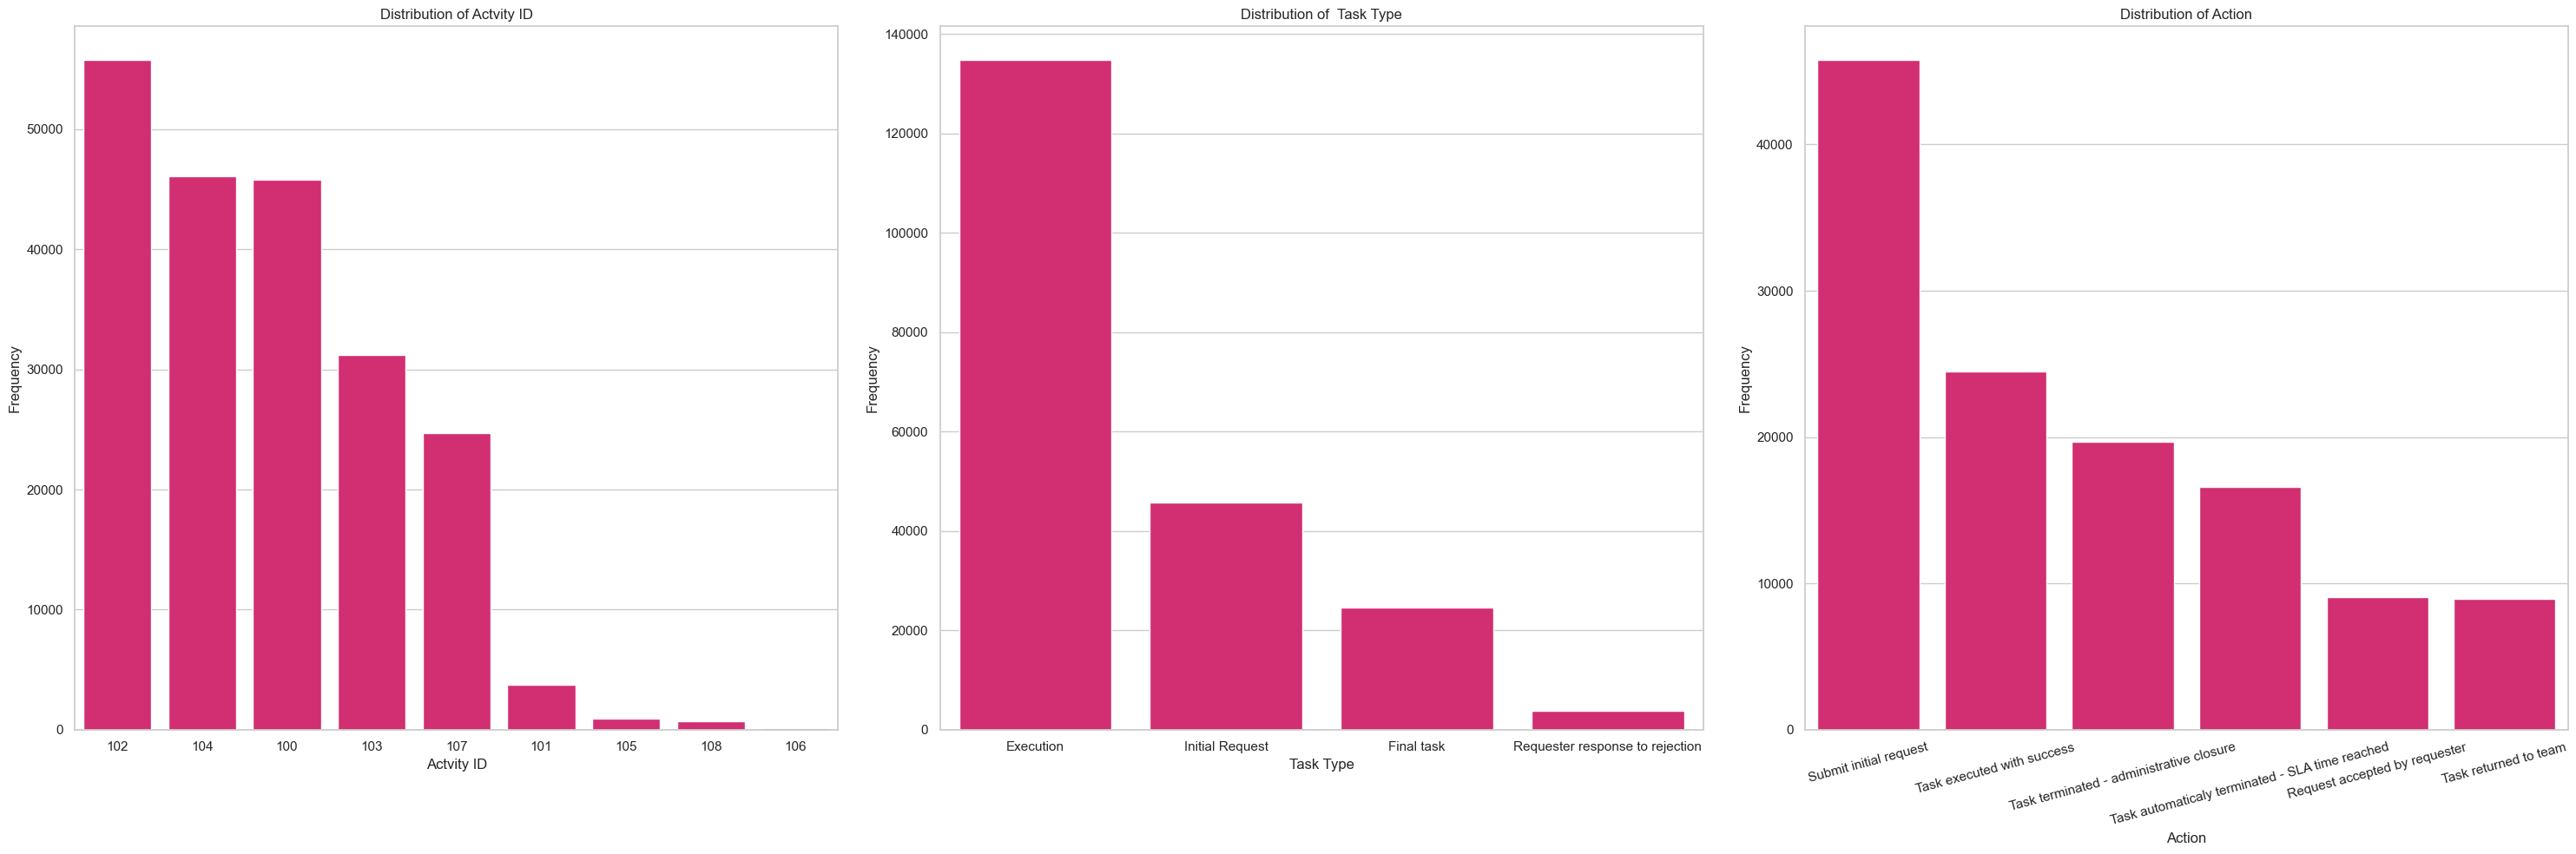

In [42]:
# create a figure with 1 rows and 3 columns and set its size
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Distribution of 'Activity ID' variable
# create a count plot for the 'Activity ID' column and order it by frequency
sns.countplot(data=task_execution_data, x='Actvity ID', order=task_execution_data['Actvity ID'].value_counts().index, color='#ec146e', ax=axes[0])
# set the title
axes[0].set_title('Distribution of Actvity ID')
# set label for x-axis 
axes[0].set_xlabel('Actvity ID')
# set label for y-axis
axes[0].set_ylabel('Frequency')

# Distribution of 'Task Type' variable
# create a count plot for the 'Task Type' column and order it by frequency
sns.countplot(data=task_execution_data, x='Task Type', order=task_execution_data['Task Type'].value_counts().index, color='#ec146e', ax=axes[1])
# set the title
axes[1].set_title('Distribution of  Task Type')
# set label for x-axis 
axes[1].set_xlabel('Task Type')
# set label for y-axis
axes[1].set_ylabel('Frequency')

# Distribution of 'Action' variable
# create a count plot for the 'Action' column and order it by frequency
sns.countplot(data=task_execution_data, x='Action', order=task_execution_data['Action'].value_counts().index, color='#ec146e', ax=axes[2])
# set the title
axes[2].set_title('Distribution of Action')
# set label for x-axis 
axes[2].set_xlabel('Action')
# set label for y-axis
axes[2].set_ylabel('Frequency')
# rotate x-axis labels -> better readability
plt.xticks(rotation=15)

# adjust the layout of the subplots -> prevent overlap and ensure they fit in the figure
plt.tight_layout()
# display the plots
plt.show()

## 3.3 Specific Request Data

In [43]:
# display request_data
request_data

,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0
...,...,...,...
297551,1604,1995,90
297552,1604,2010,90
297553,1604,2280,90
297554,1604,2227,90


In [44]:
# check request data information
request_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297556 entries, 0 to 297555
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   idField             297556 non-null  int64 
 1   Request Identifier  297556 non-null  int64 
 2   Value               297556 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [45]:
# calculate the number of missing values in each column
request_data.isna().sum()

idField               0
Request Identifier    0
Value                 0
dtype: int64

In [46]:
# calculate the number of unique vales in the column 'idField'
request_data['idField'].nunique()

11

In [47]:
# calculate the number of unique vales in the column 'Request Identifier'
request_data['Request Identifier'].nunique()

45772

In [48]:
# calculate the number of unique vales in the column 'Value'
request_data['Value'].nunique()

753

In [49]:
# check for duplicate rows in the DataFrame
request_data.duplicated().value_counts()

False    297556
Name: count, dtype: int64

In [50]:
# check for duplicate values in the column 'idField' 
request_data.duplicated(subset='idField').value_counts()

True     297545
False        11
Name: count, dtype: int64

## 3.4 Rejections Data

In [51]:
# check Rejections data information
rejections_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Task Id           4099 non-null   int64
 1   idBPMRequirement  4099 non-null   int64
dtypes: int64(2)
memory usage: 64.2 KB


In [52]:
# calculate the number of missing values in each column
rejections_data.isna().sum()

Task Id             0
idBPMRequirement    0
dtype: int64

In [53]:
# check for duplicate rows in the dataframe
rejections_data.duplicated().value_counts()

False    4099
Name: count, dtype: int64

In [54]:
# check for duplicate values in the column 'Task Id'
rejections_data['Task Id'].value_counts()

# some tasks ids repeated

Task Id
1654061    7
1647860    6
1925405    2
2999956    2
3139691    2
          ..
3266189    1
3266202    1
3266928    1
3267685    1
6636734    1
Name: count, Length: 4056, dtype: int64

# 4. Data Cleaning and Validation

### 4.1 User data

In [55]:
# check user data information
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11346 entries, 0 to 11369
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Task Executer  11346 non-null  int64 
 1   Sex            11346 non-null  object
 2   BirthYear      11346 non-null  int64 
 3   Role ID        11346 non-null  int64 
 4   Is Manager     11346 non-null  object
 5   OrgUnitSince   11346 non-null  int64 
 6   IsOutSourcer   11346 non-null  object
dtypes: int64(4), object(3)
memory usage: 709.1+ KB


In [56]:
# convert the column 'Task Executer' to a string data type
user_data['Task Executer'] = user_data['Task Executer'].astype(str)

In [57]:
# change ' ' and 'U' to 'R' in the column 'Sex' -> R for Robots
user_data['Sex'] = user_data['Sex'].replace(' ', 'R')
user_data['Sex'] = user_data['Sex'].replace('U', 'R')
# check the unique values in the column 'Sex'
print(user_data['Sex'].unique())

['F' 'M' 'R']


In [58]:
# store the unique values from the 'Task Executer' column in 'user_test1'
user_test1 = task_execution_data['Task Executer'].unique()
# filter the DataFrame to store only the rows where 'Task Executer' values are in 'user_test1'
filtered_user_data = user_data[user_data['Task Executer'].isin(user_test1)] 

# check for duplicates in the filtered DataFrame
duplicates = filtered_user_data.duplicated()
# count the number of duplicate rows
duplicates.sum()

0

### 4.2 Task execution data

In [59]:
# check task execution data information
task_execution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Task Id                   209017 non-null  int64 
 1   Request Identifier        209017 non-null  int64 
 2   Task arrival date         209017 non-null  object
 3   Task capture date         209017 non-null  object
 4   Task execution end date   209017 non-null  object
 5   Task predicted end date   163232 non-null  object
 6   Actvity ID                209017 non-null  int64 
 7   Task Executer             188888 non-null  object
 8   Task executer department  181887 non-null  object
 9   Task Type                 209017 non-null  object
 10  Action                    124576 non-null  object
 11  idBPMApplicationAction    209017 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 19.1+ MB


In [60]:
# change data types to int and (fill missing values)

# task_execution_data['Task Executer'].fillna(0, inplace=True)

# convert the column 'Task Executer' to a string data type
task_execution_data['Task Executer'] = task_execution_data['Task Executer'].astype(str)

# ['Task executer department'].fillna(0, inplace=True)

# convert the column 'Task executer department' to a string data type
task_execution_data['Task executer department'] = task_execution_data['Task executer department'].astype(str)

In [61]:
# convert the column 'Task arrival date' to datetime format
task_execution_data['Task arrival date'] = pd.to_datetime(task_execution_data['Task arrival date'])
# convert the column 'Task capture date' to datetime format
task_execution_data['Task capture date'] = pd.to_datetime(task_execution_data['Task capture date'])
# convert the column 'Task execution end date' to datetime format
task_execution_data['Task execution end date'] = pd.to_datetime(task_execution_data['Task execution end date'])

# convert the column 'Task predicted end date' to datetime format, handling null values automatically
task_execution_data['Task predicted end date'] = pd.to_datetime(task_execution_data['Task predicted end date'], errors='coerce')

# show data types of the columns -> verifying the changes
print(task_execution_data.dtypes)

Task Id                              int64
Request Identifier                   int64
Task arrival date           datetime64[ns]
Task capture date           datetime64[ns]
Task execution end date     datetime64[ns]
Task predicted end date     datetime64[ns]
Actvity ID                           int64
Task Executer                       object
Task executer department            object
Task Type                           object
Action                              object
idBPMApplicationAction               int64
dtype: object


### 4.3 Request data

In [62]:
# check request data information
request_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297556 entries, 0 to 297555
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   idField             297556 non-null  int64 
 1   Request Identifier  297556 non-null  int64 
 2   Value               297556 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [63]:
# count the occurrences of each unique value in the column 'idField'
request_data['idField'].value_counts()

idField
3388    45772
3486    45772
203     45772
3391    44476
3390    37521
3491    29883
3420    14651
3935    14287
47       6781
1602     6521
1604     6120
Name: count, dtype: int64

In [64]:
# show the first 100 rows
request_data.head(100)

,idField,Request Identifier,Value
0,47,328,0
1,47,327,0
2,47,291,0
3,47,289,0
4,47,219,0
...,...,...,...
95,47,15271,0
96,47,15356,0
97,47,15802,0
98,47,15870,0


In [65]:
# create a pivot table: 'Request Identifier' as the index, 'idField' as columns, and 'Value' as the values
# reset the index -> 'Request Identifier' back into a column 
pivot_request_data = request_data.pivot(index='Request Identifier', columns='idField', values='Value').reset_index()

In [66]:
# show the pivot table
pivot_request_data

idField,Request Identifier,47,203,1602,1604,3388,3390,3391,3420,3486,3491,3935
0,1,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN
1,2,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN
2,3,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,30,10,NaN,10,30,NaN,NaN
3,4,NaN,2022-04-12T23:00:00.000Z,NaN,NaN,10,10,NaN,20,10,NaN,NaN
4,5,NaN,2022-04-05T23:00:00.000Z,NaN,NaN,20,30,10,10,30,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45767,45768,NaN,2024-03-31T23:00:00.000Z,NaN,NaN,50,10,70,NaN,50,10,NaN
45768,45769,NaN,2024-03-31T23:00:00.000Z,NaN,NaN,50,100,70,NaN,50,10,NaN
45769,45770,2,2024-03-31T23:00:00.000Z,2,100,40,10,60,NaN,30,NaN,50
45770,45771,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50


In [67]:
# get the shape of the task execution DataFrame
task_execution_data.shape
# result: (number of rows, number of columns)

(209017, 12)

In [68]:
# merge the task execution data with the pivot table data
# left join on the column 'Request Identifier'
merged_data = pd.merge(task_execution_data, pivot_request_data, how='left', on = 'Request Identifier')

In [69]:
#merged_data['47'].fillna(0, inplace=True)

In [70]:
# check merged data information
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209017 entries, 0 to 209016
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Task Id                   209017 non-null  int64         
 1   Request Identifier        209017 non-null  int64         
 2   Task arrival date         209017 non-null  datetime64[ns]
 3   Task capture date         209017 non-null  datetime64[ns]
 4   Task execution end date   209017 non-null  datetime64[ns]
 5   Task predicted end date   163232 non-null  datetime64[ns]
 6   Actvity ID                209017 non-null  int64         
 7   Task Executer             209017 non-null  object        
 8   Task executer department  209017 non-null  object        
 9   Task Type                 209017 non-null  object        
 10  Action                    124576 non-null  object        
 11  idBPMApplicationAction    209017 non-null  int64         
 12  47

In [71]:
# merge the previously merged data with the user data
# left join on the column 'Task Executer'
merged_data = pd.merge(merged_data, user_data, how='left', on = 'Task Executer')

In [72]:
# check merged data
merged_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,3420,3486,3491,3935,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,20,10,10,NaN,F,1975.0,11.0,Yes,2023.0,N
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,NaN,30,100,NaN,F,1975.0,11.0,Yes,2023.0,N
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,NaN,30,100,NaN,F,1975.0,11.0,Yes,2023.0,N
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,NaN,30,100,NaN,F,1999.0,4.0,Yes,2023.0,N
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,NaN,30,100,NaN,F,1976.0,6.0,Yes,2018.0,N


In [73]:
# dictionary to map old column names to new ones
column_rename_mapping = {
    47: 'idField47',
    203: 'idField203',
    1602: 'idField1602',
    1604: 'idField1604',
    3388: 'idField3388',
    3390: 'idField3390',
    3391: 'idField3391',
    3420: 'idField3420',
    3486: 'idField3486',
    3491: 'idField3491',
    3935: 'idField3935'
    # Add more mappings as needed
}

# rename the columns using the mapping
merged_data.rename(columns=column_rename_mapping, inplace=True)

In [74]:
# check merged data
merged_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,idField3420,idField3486,idField3491,idField3935,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,20,10,10,NaN,F,1975.0,11.0,Yes,2023.0,N
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,NaN,30,100,NaN,F,1975.0,11.0,Yes,2023.0,N
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,NaN,30,100,NaN,F,1975.0,11.0,Yes,2023.0,N
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,NaN,30,100,NaN,F,1999.0,4.0,Yes,2023.0,N
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,NaN,30,100,NaN,F,1976.0,6.0,Yes,2018.0,N


# 5. Preprocessing

# New variables

In [75]:
# create a copy of the merged DataFrame
merged_df = merged_data.copy()

In [76]:
# create a new variable: 'Queue Time'
merged_df['Queue Time']=merged_df['Task capture date']-merged_df['Task arrival date']

In [77]:
# create a new variable: 'On time' -> if the task was performed on time 
# to not be too strict we are asssessing only the day and hour
merged_df['On time'] = np.where(
    merged_df['Task predicted end date'].isna(), 'not_applicable',
    np.where(
        merged_df['Task execution end date'].dt.floor('H') == merged_df['Task predicted end date'].dt.floor('H'),
        'yes', 'no'))

# check the dataframe with new variables
merged_df.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,idField3491,idField3935,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Queue Time,On time
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,10,NaN,M,1967.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 17:27:25.940000,no
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,10,NaN,F,1975.0,11.0,Yes,2023.0,N,0 days 00:11:43.760000,no
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,10,NaN,M,1967.0,5.0,Yes,2021.0,N,0 days 00:05:31.183000,no
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,10,NaN,M,1967.0,5.0,Yes,2021.0,N,0 days 00:04:20.943000,no


In [78]:
# count the occurrences of each unique value in the column 'On time'
merged_df['On time'].value_counts()

On time
no                144251
not_applicable     45785
yes                18981
Name: count, dtype: int64

In [79]:
# create a pivot table of the start (minimum) and end (maximum) timestamps associated with each request identifier

# calculate the minimum 'Task arrival date' and maxium 'Task execution end date' for each 'Request Identifier'
case_starts_ends= task_execution_data.pivot_table(index='Request Identifier', aggfunc={'Task arrival date': "min", 'Task execution end date': "max"})         
# reset the index -> turn 'Request Identifier' from index into a column
case_starts_ends = case_starts_ends.reset_index() 
# rename the columns -> clarity
case_starts_ends.columns = ['Request Identifier', 'requeststart', 'requestend'] 
# show the first five rows
case_starts_ends.head()

,Request Identifier,requeststart,requestend
0,1,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353
1,2,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340
2,3,2022-04-12 18:09:29.153,2022-04-13 13:16:14.933
3,4,2022-04-13 08:15:39.620,2022-04-26 09:54:32.757
4,5,2022-04-13 08:37:34.943,2023-09-22 14:48:00.000


In [80]:
# create new variables: 'relativetime', 'relativetime_s', 'relativedays' -> time of the requests (from start to current action)

# ensure that for each row we have the start and end times for each request identifier
merged_df =merged_df.merge(case_starts_ends, on='Request Identifier') 
# calculate the relative time as the difference between 'Task arrival date' and 'requeststart'
merged_df['relativetime'] = merged_df['Task arrival date'] - merged_df['requeststart']
# convert relative times to more friendly measures
# in seconds
merged_df['relativetime_s'] = merged_df['relativetime'].dt.seconds + 86400*merged_df['relativetime'].dt.days 
# in days
merged_df['relativedays'] = merged_df['relativetime'].dt.days
# show the first 2 rows
merged_df.head(2)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Is Manager,OrgUnitSince,IsOutSourcer,Queue Time,On time,requeststart,requestend,relativetime,relativetime_s,relativedays
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,No,2024.0,Y,0 days 17:27:25.940000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0


In [81]:
# create a new variable: 'numactions' -> how many steps does the request last

# calculate the number of steps for each 'Request Identifier'
request_lengths = merged_df['Request Identifier'].value_counts().reset_index()
# rename the columns -> clarity
request_lengths.columns = ['Request Identifier', 'numactions']
# merge this information back into the main DataFrame
merged_df = merged_df.merge(request_lengths, on='Request Identifier')
# show the first 15 rows
merged_df.head(15)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,OrgUnitSince,IsOutSourcer,Queue Time,On time,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,2021.0,N,0 days 00:00:00,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,2024.0,Y,0 days 17:27:25.940000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,2023.0,N,0 days 00:11:43.760000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:00:41.710000,64841,0,5
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,2021.0,N,0 days 00:05:31.183000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:15:02.607000,65702,0,5
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,2021.0,N,0 days 00:04:20.943000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,28 days 21:41:18.807000,2497278,28,5
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,...,2023.0,N,0 days 00:00:00,not_applicable,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00,0,0,5
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,...,2024.0,Y,0 days 00:01:34.056000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00.577000,0,0,5
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,nan,Execution,...,2023.0,N,0 days 01:08:28.717000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 01:45:31.320000,6331,0,5
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,...,2023.0,N,0 days 00:08:17.273000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 02:54:59.277000,10499,0,5
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,...,2023.0,N,0 days 00:03:10.797000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 03:28:11.310000,12491,0,5


In [82]:
# create new variables: 'weekday_arrival' and 'weekday_exec'

# calculate the day of the week for 'Task arrival date'
merged_df['weekday_arrival'] = merged_df['Task arrival date'].apply(lambda x: x.weekday())
# calculate the day of the week for 'Task execution end date'
merged_df['weekday_exec'] = merged_df['Task execution end date'].apply(lambda x: x.weekday())

In [83]:
# create a new variable: 'last_application_action' -> last step undertaken for every request

# sort the DataFrame by 'Request Identifier' and 'Task execution end date'
merged_df1 = merged_df.sort_values(by=['Request Identifier', 'Task execution end date'])
# group by 'Request Identifier' -> get the last 'idBPMApplicationAction' for each group
last_actions = merged_df1.groupby('Request Identifier')['idBPMApplicationAction'].last().reset_index()
# rename the columns -> clarity
last_actions.columns = ['Request Identifier', 'last_application_action']

# merge the last application action back into the original DataFrame
merged_df = merged_df.merge(last_actions, on='Request Identifier')
# show the first 3 rows
merged_df.head(3)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,On time,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5,0,0,299
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5,0,1,299
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:00:41.710000,64841,0,5,1,1,299


In [84]:
# check the unique values of the column 'last_application_action'
merged_df['last_application_action'].unique()

array([ 299,  298, 2981, 8888,  888], dtype=int64)

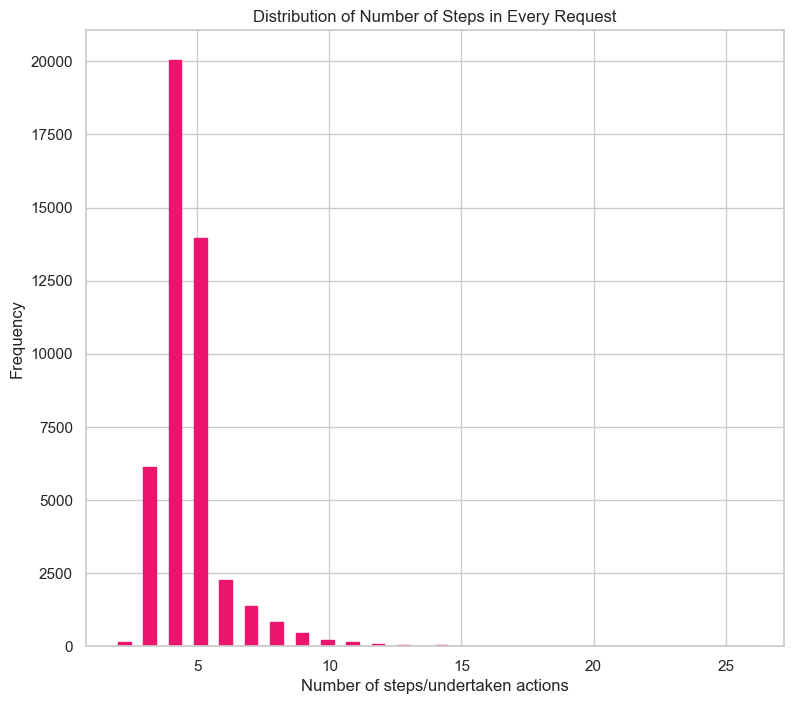

In [85]:
# Distribution of the number of steps in every request

# drop duplicate rows based on 'Request Identifier' column to get unique requests
unique_requests = merged_df.drop_duplicates(subset='Request Identifier')
# set the size of the plot
plt.figure(figsize=(9, 8))
# create a histogram for the 'numaction' column
plt.hist(unique_requests['numactions'], bins=50, edgecolor='#ec146e', color = '#ec146e')
# set the title
plt.title('Distribution of Number of Steps in Every Request')
# set label for x-axis
plt.xlabel('Number of steps/undertaken actions')
# set label for y-axis
plt.ylabel('Frequency')
# display the plot
plt.show()

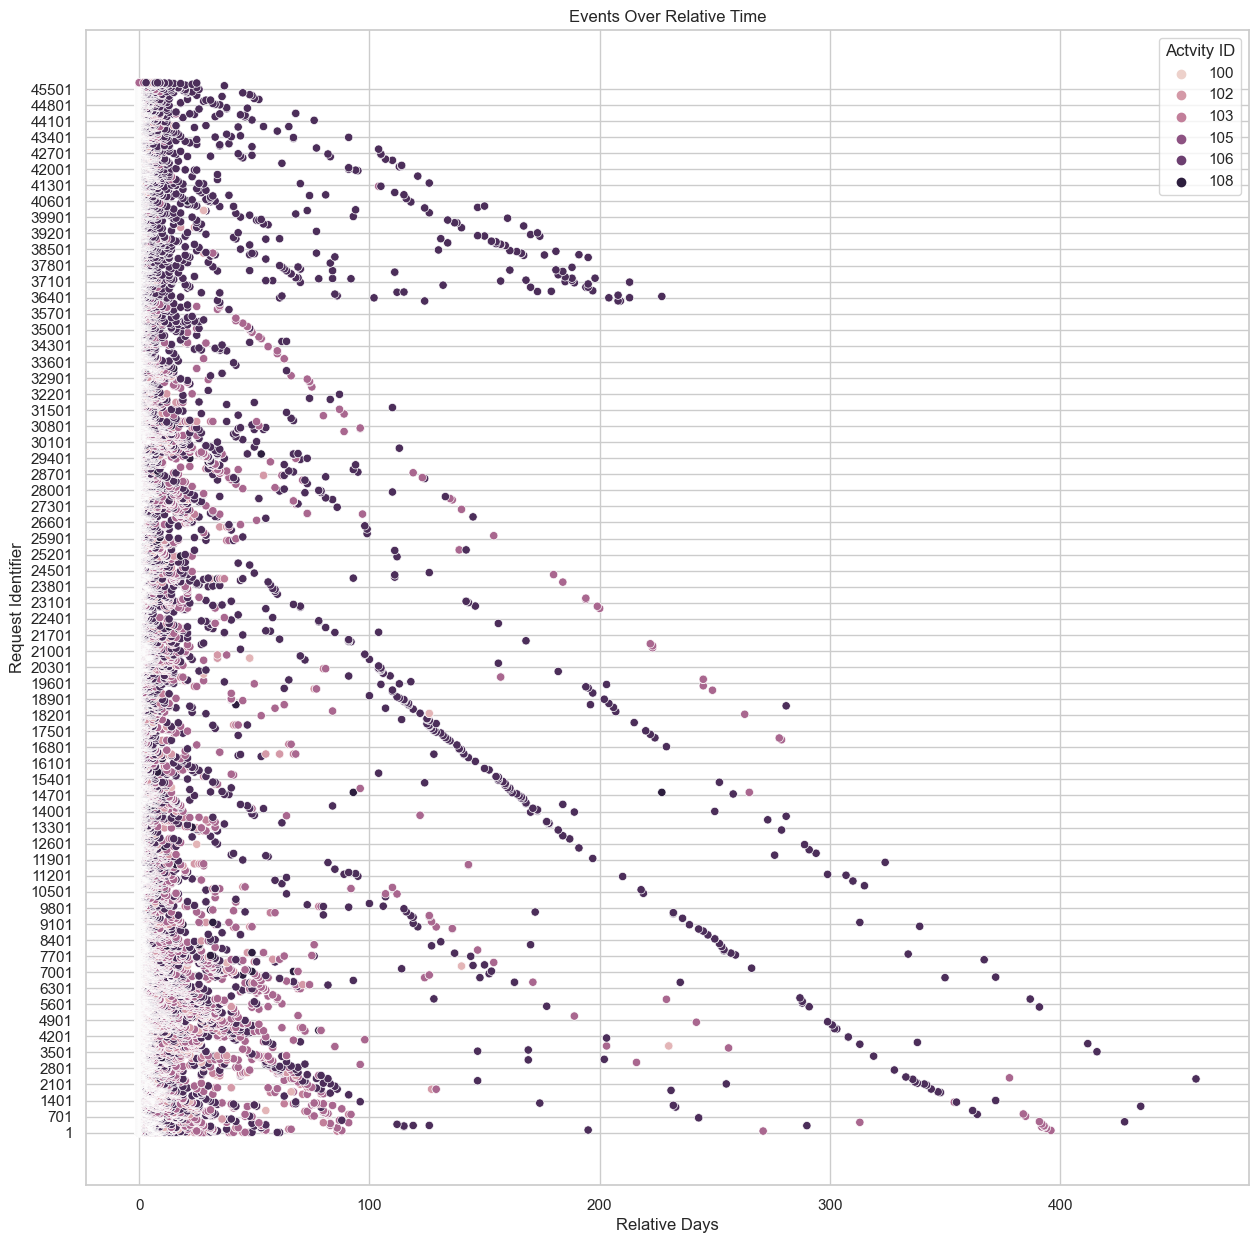

In [86]:
# convert the 'Request Identifier' column to a list of integers
requestnums = [int(e) for e in merged_df['Request Identifier']]
# set size of the plot
plt.figure(figsize=(15, 15))

# create a scatter plot for events over relative time
# 'relativedays' for x-axis
# 'Request Identifier' for y-axis
ax = sns.scatterplot(x=merged_df['relativedays'],
                     y=merged_df['Request Identifier'], hue=merged_df['Actvity ID'])

# set y axis ticks -> only show every 700th request -> better readability
plt.yticks(np.arange(min(requestnums), max(requestnums)+1, 700))

# set the title
plt.title('Events Over Relative Time')
# set label for x-axis
plt.xlabel('Relative Days')
# set label for y-axis
plt.ylabel('Request Identifier')

# display the plot
plt.show()

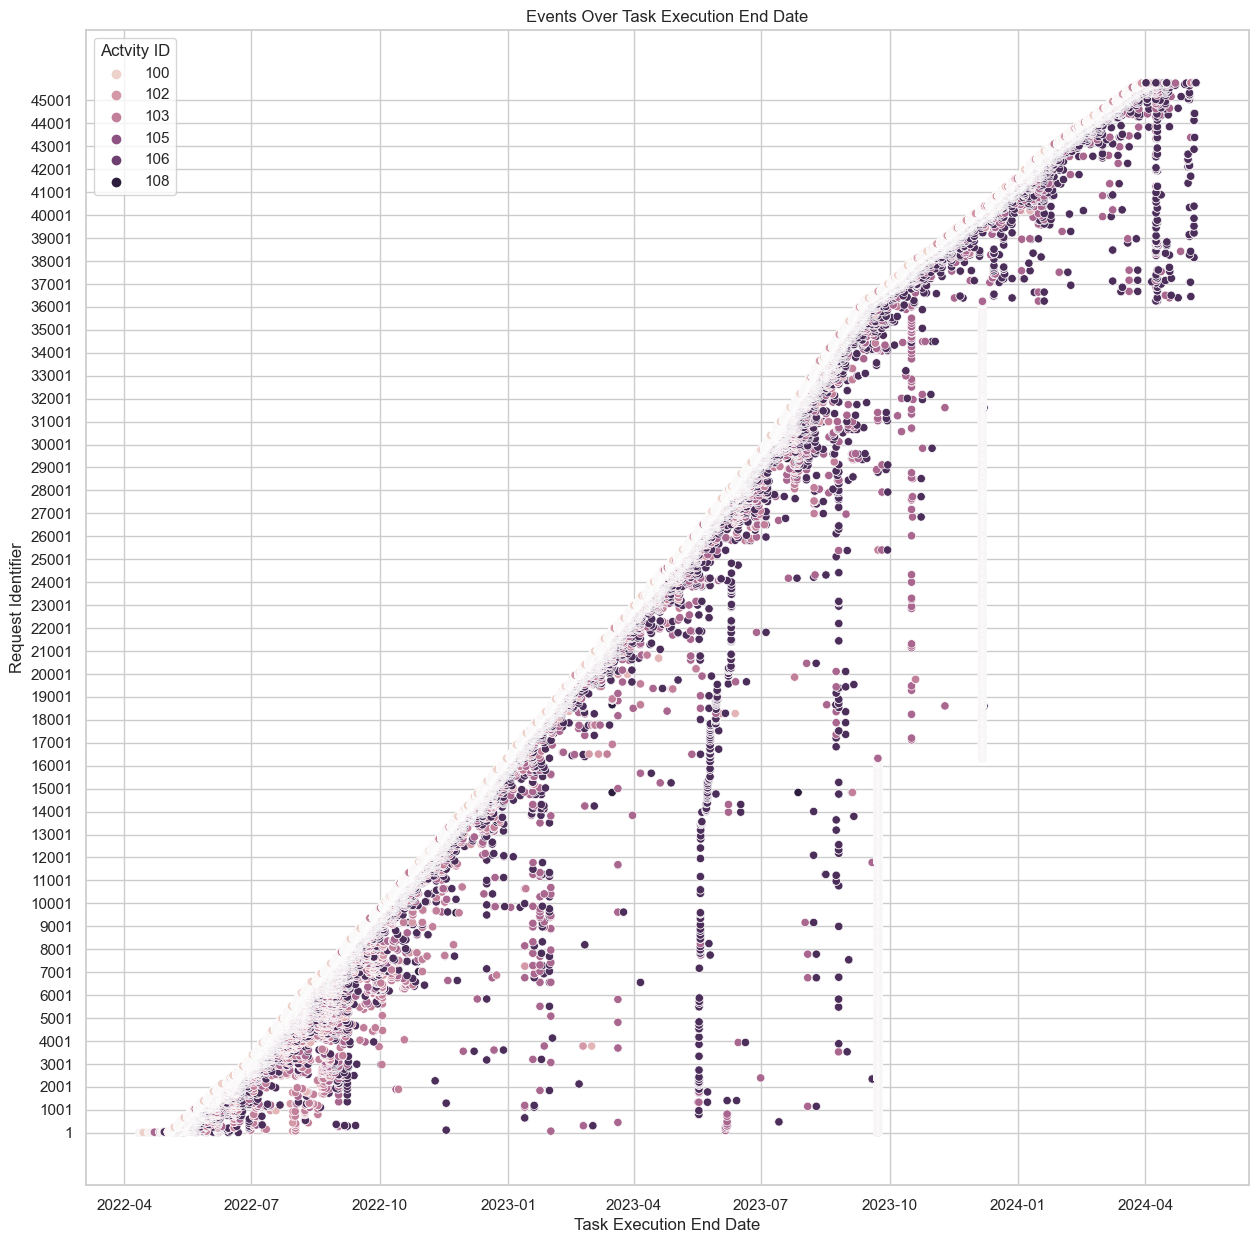

In [87]:
# set size of the plot
plt.figure(figsize=(15, 15))
# create a scatter plot for events over 'Task execution end date' 
# 'Task execution end date' for x-axis
# 'Request Identifier' for y-axis
ax = sns.scatterplot(x=merged_df['Task execution end date'], y=merged_df['Request Identifier'], hue=merged_df['Actvity ID']) 
# set y axis ticks -> only show every 1000th request -> better readability
plt.yticks(np.arange(min(requestnums), max(requestnums)+1, 1000))

# set the title
plt.title('Events Over Task Execution End Date')
# set label for x-axis
plt.xlabel('Task Execution End Date')
# set label for y-axis
plt.ylabel('Request Identifier')

# display the plot
plt.show()

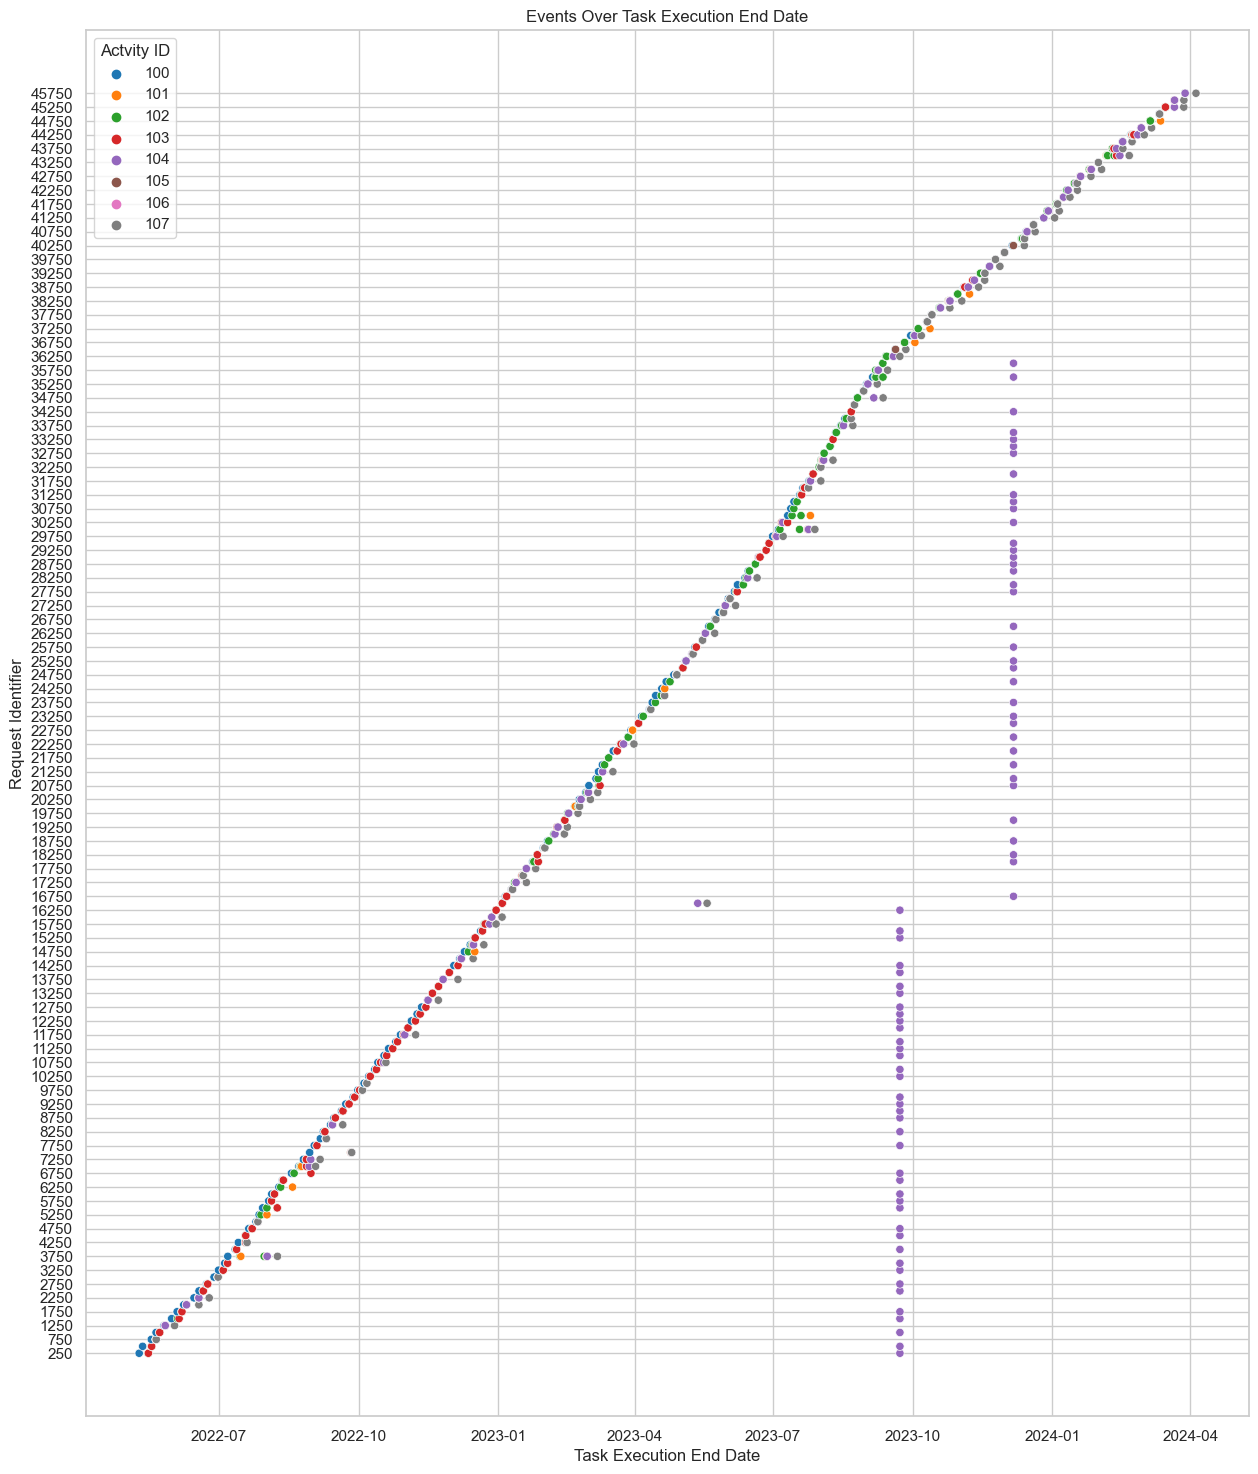

In [88]:
# convert the 'Request Identifier' column to a list of integers
requestnums = [int(e) for e in merged_df['Request Identifier']]
# sample rows from the merged DataFrame where 'Request Identifier' is divisible by 250
sampled_requests = merged_df[merged_df['Request Identifier'] % 250 == 0]

# set size of the plot
plt.figure(figsize=(15, 18))

# create a scatter plot for events over 'Task execution end date' 
# 'Task execution end date' for x-axis
# 'Request Identifier' for y-axis
ax = sns.scatterplot(x=sampled_requests['Task execution end date'], 
                     y=sampled_requests['Request Identifier'], 
                     hue=sampled_requests['Actvity ID'], 
                     palette='tab10')

# set y axis at intervals of 500
plt.yticks(np.arange(min(sampled_requests['Request Identifier']), max(sampled_requests['Request Identifier'])+1, 500))

# set the title
plt.title('Events Over Task Execution End Date')
# set label for x-axis
plt.xlabel('Task Execution End Date')
# set label for y-axis
plt.ylabel('Request Identifier')

# display the plot
plt.show()

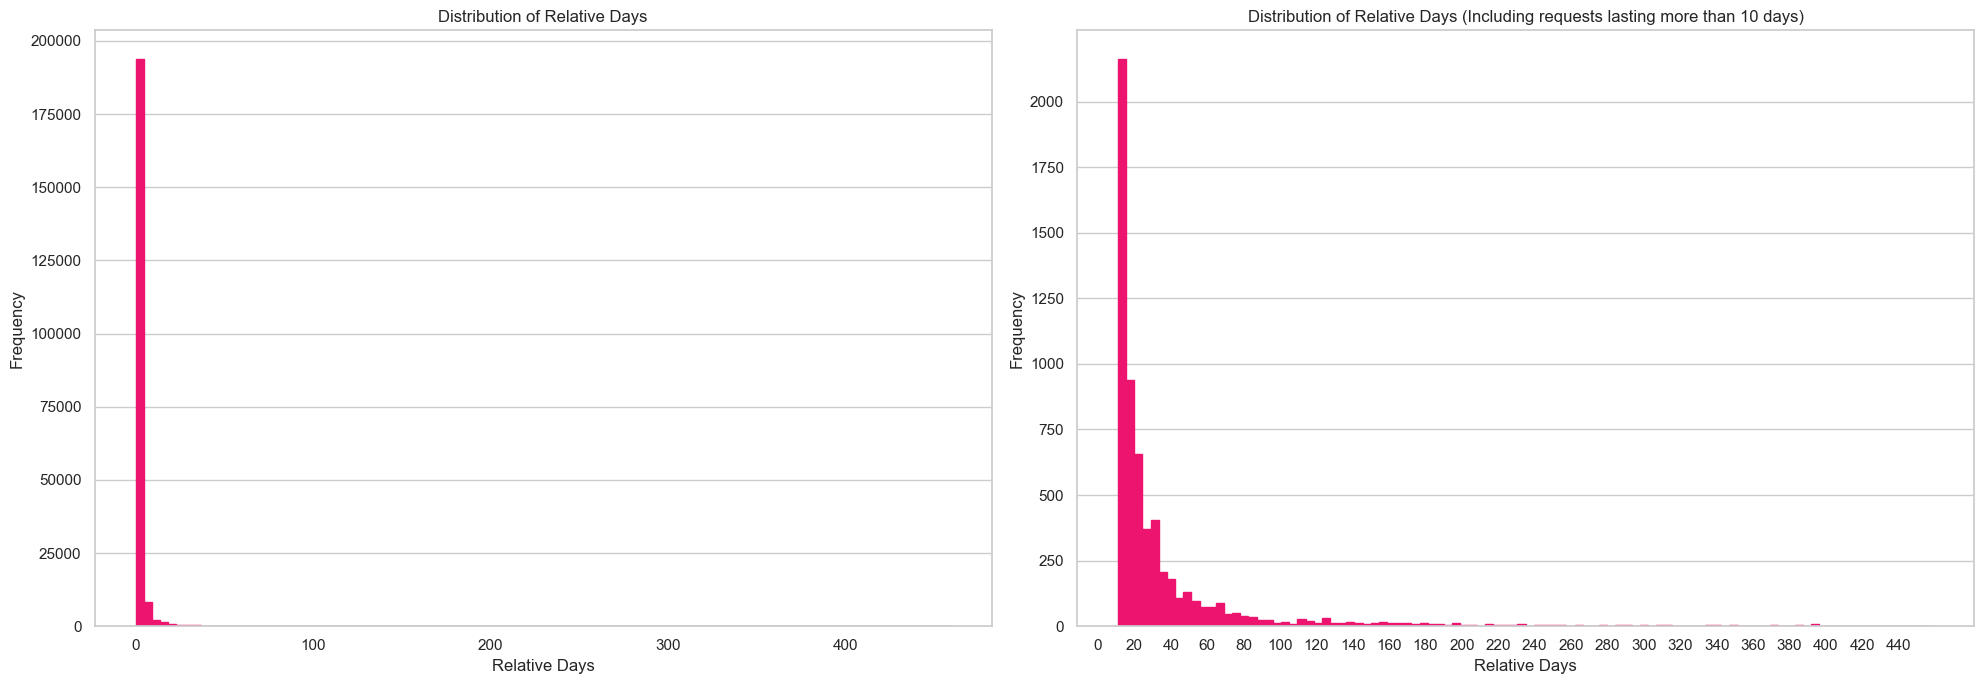

In [89]:
# set the size of the figure for the plots
plt.figure(figsize=(20, 7))

# Subplot 1: Distribution of relative days
plt.subplot(1, 2, 1)
# create a histogram of 'relativedays'
plt.hist(merged_df['relativedays'], bins=100, edgecolor='#ec146e', color = '#ec146e')
# set the title
plt.title('Distribution of Relative Days')
# set label for x-axis
plt.xlabel('Relative Days')
# set label for y-axis
plt.ylabel('Frequency')
# display grid lines along the x-axis
plt.grid(axis='x')

# Subplot 2: Distribution of Relative Days (excluding days <= 10)
# filter the rows where 'relativedays' higher than 10
filtered_df = merged_df[merged_df['relativedays'] > 10]
plt.subplot(1, 2, 2)
# create a histogram of filtered 'relativedays'
plt.hist(filtered_df['relativedays'], bins=100, edgecolor='#ec146e', color = '#ec146e')
# set the title
plt.title('Distribution of Relative Days (Including requests lasting more than 10 days)')
# set label for x-axis
plt.xlabel('Relative Days')
# set label for y-axis
plt.ylabel('Frequency')
# set x-axis at intervals of 20
plt.xticks(np.arange(0, max(filtered_df['relativedays']) + 1, 20))
# set y-axis at intervals of 250
plt.yticks(np.arange(0, max(np.histogram(filtered_df['relativedays'], bins=100)[0]) + 1, 250))
# display grid lines along the x-axis
plt.grid(axis='x')

# adjust the layout -> prevent overlap
plt.tight_layout()
# display the plots
plt.show()

# 6. Selecting Important Data

In [90]:
# check merged DataFrame
merged_df

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,On time,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5,0,0,299
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5,0,1,299
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:00:41.710000,64841,0,5,1,1,299
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:15:02.607000,65702,0,5,1,1,299
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,28 days 21:41:18.807000,2497278,28,5,1,1,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,no,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 00:00:00.360000,0,0,6,4,4,299
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,no,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 01:09:08.880000,4148,0,6,4,4,299
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,no,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 02:10:57.080000,7857,0,6,4,0,299
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,no,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,2 days 17:37:41.227000,236261,2,6,0,1,299


In [91]:
# add new variable to merged DataFrame: 'Event_ID'
# group data by 'Request Identifier' and use cumulative count within each group (starting from 1)
merged_df['Event_ID'] = merged_df.groupby('Request Identifier').cumcount()+1

### Outcomes review for different end applications

In [92]:
# check the unique values in the column 'last_application_action'
merged_df['last_application_action'].unique()

array([ 299,  298, 2981, 8888,  888], dtype=int64)

#### 8888

In [93]:
# filter data -> include only rows where 'idBPMApplicationAction' equals 8888
filtered_df = merged_df[merged_df['idBPMApplicationAction'] == 8888]

# get the value counts and the unique values of 'Actvity ID' in the filtered DataFrame
activity_id_counts = filtered_df['Actvity ID'].value_counts()
unique_activity_ids = filtered_df['Actvity ID'].unique()

# display the value counts results for 'Activity ID'
print("Value counts of Actvity ID where idBPMApplicationAction == 8888:")
print(activity_id_counts)

# get the value counts and the unique values of 'Action' in the filtered DataFrame
action_counts = filtered_df['Action'].value_counts()

# display the value counts results for 'Action'
print("")
print("Value counts of Action where idBPMApplicationAction == 8888:")
print(action_counts)

Value counts of Actvity ID where idBPMApplicationAction == 8888:
Actvity ID
104    19678
107        2
102        1
Name: count, dtype: int64

Value counts of Action where idBPMApplicationAction == 8888:
Action
Task terminated - administrative closure    19681
Name: count, dtype: int64


In [94]:
# filter data to include only rows where 'idBPMApplicationAction' equals 8888 and 'Actvity ID' equals 107
merged_df[(merged_df['idBPMApplicationAction'] == 8888) & (merged_df['Actvity ID'] == 107)]

# Requests 18607, 31609

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID
84029,4478712,18607,2023-11-09 14:41:25.630,2023-12-07 14:33:00,2023-12-07 14:33:00,2023-11-16 09:41:25.727,107,538,1301,Final task,...,2023-01-31 17:12:13.287,2023-12-07 14:33:00,281 days 21:29:12.343000,24355752,281,5,3,3,8888,5
139970,4478677,31609,2023-11-09 14:37:03.910,2023-12-07 14:33:00,2023-12-07 14:33:00,2023-11-16 09:37:03.997,107,538,1301,Final task,...,2023-07-21 16:40:33.680,2023-12-07 14:33:00,110 days 21:56:30.230000,9582990,110,4,3,3,8888,4


In [95]:
# filter data to include only rows where 'idBPMApplicationAction' equals 8888 and 'Actvity ID' equals 102
merged_df[(merged_df['idBPMApplicationAction'] == 8888) & (merged_df['Actvity ID'] == 102)]

# Request 6897

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID
30765,2096384,6897,2022-08-23 20:14:46.587,2023-09-22 14:48:00,2023-09-22 14:48:00,2022-08-24 15:30:00.273,102,10606,1147,Execution,...,2022-08-19 12:05:56.813,2023-09-22 14:48:00,4 days 08:08:49.774000,374929,4,4,1,4,8888,3


In [96]:
# filter the merged data -> include only rows where 'Action' = 'Task terminated - administrative closure'
filtered2 = merged_df[merged_df['Action'] == 'Task terminated - administrative closure']

# get the value counts of 'idBPMApplicationAction' in the filtered DataFrame
idBPMApplicationAction_counts = filtered2['idBPMApplicationAction'].value_counts()

# display the results
print("Value counts of idBPMApplicationAction_counts where Action is Task terminated - administrative closure")
print(idBPMApplicationAction_counts)

Value counts of idBPMApplicationAction_counts where Action is Task terminated - administrative closure
idBPMApplicationAction
8888    19681
Name: count, dtype: int64


#### 888

In [97]:
# filter the merged data -> include only rows where 'idBPMApplicationAction' equals 888
filtered_df_888 = merged_df[merged_df['idBPMApplicationAction'] == 888]

# get the value counts and the unique values of the column 'Actvity ID' in the filtered DataFrame
activity_id_counts = filtered_df_888['Actvity ID'].value_counts()
unique_activity_ids = filtered_df_888['Actvity ID'].unique()

# display the value counts of 'Actvity ID'
print("Value counts of Actvity ID where idBPMApplicationAction == 888:")
print(activity_id_counts)

# get the value counts of the column 'Action' in the filtered DataFrame
action_counts = filtered_df_888['Action'].value_counts()

# display the value counts of 'Action'
print("")
print("Value counts of Action where idBPMApplicationAction == 888:")
print(action_counts)

Value counts of Actvity ID where idBPMApplicationAction == 888:
Actvity ID
107    15116
102        1
Name: count, dtype: int64

Value counts of Action where idBPMApplicationAction == 888:
Action
Task automaticaly terminated - SLA time reached    15117
Name: count, dtype: int64


In [98]:
# filter data to include only rows where 'idBPMApplicationAction' equals 888 and 'Actvity ID' equals 102
merged_df[(merged_df['idBPMApplicationAction'] == 888) & (merged_df['Actvity ID'] == 102)]

# Request 41294

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID
184888,4856666,41294,2023-12-26 14:44:31.857,2024-01-04 11:36:14.927,2023-12-26 14:45:26.710,2023-12-27 12:40:18.390,102,nan,nan,Execution,...,2023-12-26 14:40:16.490,2024-01-04 11:36:14.927,0 days 00:04:15.367000,255,0,8,1,1,888,3


#### 2981

In [99]:
# filter the merged data -> include only rows where 'idBPMApplicationAction' equals 2981
filtered_df_2981 = merged_df[merged_df['idBPMApplicationAction'] == 2981]

# get the value counts and the unique values of the column 'Actvity ID' in the filtered DataFrame
activity_id_counts = filtered_df_2981['Actvity ID'].value_counts()
unique_activity_ids = filtered_df_2981['Actvity ID'].unique()

# display the value counts of 'Actvity ID'
print("Value counts of Actvity ID where idBPMApplicationAction == 2981:")
print(activity_id_counts)

# get the value counts of the column 'Action' in the filtered DataFrame
action_counts = filtered_df_2981['Action'].value_counts()

# display the value counts of 'Action'
print("")
print("Value counts of Action where idBPMApplicationAction == 2981:")
print(action_counts)

Value counts of Actvity ID where idBPMApplicationAction == 2981:
Actvity ID
101    1506
Name: count, dtype: int64

Value counts of Action where idBPMApplicationAction == 2981:
Action
Task automaticaly terminated - SLA time reached    1506
Name: count, dtype: int64


#### 299

In [100]:
# filter the merged data -> include only rows where 'idBPMApplicationAction' equals 299
filtered_df_299 = merged_df[merged_df['idBPMApplicationAction'] == 299]

# get the value counts and the unique values of the column 'Actvity ID' in the filtered DataFrame
activity_id_counts = filtered_df_299['Actvity ID'].value_counts()
unique_activity_ids = filtered_df_299['Actvity ID'].unique()

# display the value counts of 'Actvity ID'
print("Value counts of Actvity ID where idBPMApplicationAction == 299:")
print(activity_id_counts)

# get the value counts of the column 'Action' in the filtered DataFrame
action_counts = filtered_df_299['Action'].value_counts()

# display the value counts of 'Action'
print("")
print("Value counts of Action where idBPMApplicationAction == 299:")
print(action_counts)

Value counts of Actvity ID where idBPMApplicationAction == 299:
Actvity ID
107    9056
Name: count, dtype: int64

Value counts of Action where idBPMApplicationAction == 299:
Action
Request accepted by requester    9056
Name: count, dtype: int64


#### 298

In [101]:
# filter the merged data -> include only rows where 'idBPMApplicationAction' equals 298
filtered_df_298 = merged_df[merged_df['idBPMApplicationAction'] == 298]

# get the value counts and the unique values of the column 'Actvity ID' in the filtered DataFrame
activity_id_counts = filtered_df_298['Actvity ID'].value_counts()
unique_activity_ids = filtered_df_298['Actvity ID'].unique()

# display the value counts of 'Actvity ID'
print("Value counts of Actvity ID where idBPMApplicationAction == 298:")
print(activity_id_counts)

# get the value counts of the column 'Action' in the filtered DataFrame
action_counts = filtered_df_298['Action'].value_counts()

# display the value counts of 'Action'
print("")
print("Value counts of Action where idBPMApplicationAction == 298:")
print(action_counts)

Value counts of Actvity ID where idBPMApplicationAction == 298:
Actvity ID
101    257
102    153
105      3
Name: count, dtype: int64

Value counts of Action where idBPMApplicationAction == 298:
Series([], Name: count, dtype: int64)


In [102]:
# filter data to include only rows where 'idBPMApplicationAction' equals 298 and 'Actvity ID' equals 105
merged_df[(merged_df['idBPMApplicationAction'] == 298) & (merged_df['Actvity ID'] == 105)]

# 8934, 22787, 38736

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID
39902,2183563,8934,2022-09-19 09:10:08.320,2022-09-19 09:23:05.917,2022-09-19 09:23:05.917,2022-09-19 16:10:08.340,105,1147,175,Execution,...,2022-09-19 09:10:06.913,2022-09-19 09:23:05.917,0 days 00:00:01.407000,1,0,2,0,0,298,2
102302,3157901,22787,2023-03-29 15:00:41.083,2023-03-29 15:06:46.070,2023-03-29 15:06:46.070,2023-03-30 13:00:41.100,105,8303,707,Execution,...,2023-03-29 15:00:37.053,2023-03-29 15:06:46.070,0 days 00:00:04.030000,4,0,2,2,2,298,2
171733,4449550,38736,2023-11-03 16:45:08.747,2023-11-03 16:47:15.117,2023-11-03 16:47:15.117,2023-11-06 14:45:08.823,105,2109,157,Execution,...,2023-11-03 16:45:08.440,2023-11-03 16:47:15.117,0 days 00:00:00.307000,0,0,2,4,4,298,2


- Is it possible that sth goes from 102 to the end? Diagram doesn't show it

In [103]:
# list of 'Request Identifier' values to be excluded
requests=[18607, 31609, 6897, 41294, 8934, 22787, 38736]
# filter data to exclude rows where 'Request Identifier' is in the list 'requests'
merged_df = merged_df[~merged_df['Request Identifier'].isin(requests)]

In [104]:
# check DataFrame
merged_df

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5,0,0,299,1
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5,0,1,299,2
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:00:41.710000,64841,0,5,1,1,299,3
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 18:15:02.607000,65702,0,5,1,1,299,4
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,28 days 21:41:18.807000,2497278,28,5,1,1,299,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209012,6847220,45772,2024-05-03 15:33:44.133,2024-05-03 16:28:37.080,2024-05-03 16:42:52.420,2024-05-06 13:33:44.180,102,10606,1147,Execution,...,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 00:00:00.360000,0,0,6,4,4,299,2
209013,6848577,45772,2024-05-03 16:42:52.653,2024-05-03 17:44:10.993,2024-05-03 17:44:40.083,2024-05-06 14:42:52.717,103,10606,1147,Execution,...,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 01:09:08.880000,4148,0,6,4,4,299,3
209014,6851683,45772,2024-05-03 17:44:40.853,2024-05-06 09:10:57.097,2024-05-06 09:11:24.433,2024-05-06 15:30:00.977,104,2243,722,Execution,...,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 02:10:57.080000,7857,0,6,4,0,299,4
209015,6854162,45772,2024-05-06 09:11:25.000,2024-05-07 08:30:44.273,2024-05-07 08:31:28.600,2024-05-06 15:30:00.977,104,92,722,Execution,...,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,2 days 17:37:41.227000,236261,2,6,0,1,299,5


In [105]:
# Problem: the 'Last Activity' is determined not by 'Actvity ID' but by the 'last_application_action'!
# Solution: create a function based on outcomes presented

# sort the data by the columns 'Request Identifier' and 'Task execution end date' to get the order of actions
merged_df2 = merged_df.sort_values(by=['Request Identifier', 'Task execution end date'])

# get the last 'Actvity ID' for each 'Request Identifier'
last_actions_2 = merged_df2.groupby('Request Identifier')['Actvity ID'].last().reset_index()
last_actions_2.columns = ['Request Identifier', 'last_action']

# merge the last 'Actvity ID' back into the original DataFrame
merged_df = merged_df.merge(last_actions_2, on='Request Identifier')


# new variable for the outcome
# sort the data again
merged_dfx = merged_df.sort_values(by=['Request Identifier', 'Task execution end date'])

# function to determine the outcome based on 'idBPMApplicationAction'
def determine_outcome(action):
    if action in [2981, 298]:
        return 'request_canceled'
    elif action == 299:
        return 'request_finished'
    elif action == 8888:
        return 'others'
    elif action == 888:
        return 'closed_administratively'
    else:
        return 'other'

# group by 'Request Identifier' and get the last 'idBPMApplicationAction'
last_actions = merged_dfx.groupby('Request Identifier')['idBPMApplicationAction'].last().reset_index()
last_actions['Outcome'] = last_actions['idBPMApplicationAction'].apply(determine_outcome)

# merge the outcome back into the original DataFrame
merged_df = merged_df.merge(last_actions[['Request Identifier', 'Outcome']], on='Request Identifier')

# show the first 25 rows
merged_df.head(25)

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,0 days 18:00:41.710000,64841,0,5,1,1,299,3,107,request_finished
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0 days 18:15:02.607000,65702,0,5,1,1,299,4,107,request_finished
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,28 days 21:41:18.807000,2497278,28,5,1,1,299,5,107,request_finished
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,...,0 days 00:00:00,0,0,5,1,1,299,1,107,request_finished
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,...,0 days 00:00:00.577000,0,0,5,1,1,299,2,107,request_finished
7,1587111,2,2022-04-12 12:35:56.890,2022-04-12 13:44:25.607,2022-04-12 13:45:24.067,2022-04-13 10:35:56.930,103,10606,nan,Execution,...,0 days 01:45:31.320000,6331,0,5,1,1,299,3,107,request_finished
8,1587525,2,2022-04-12 13:45:24.847,2022-04-12 13:53:42.120,2022-04-12 14:18:35.850,2022-04-13 11:45:24.960,104,598,606,Execution,...,0 days 02:54:59.277000,10499,0,5,1,1,299,4,107,request_finished
9,1587689,2,2022-04-12 14:18:36.880,2022-04-12 14:21:47.677,2022-04-12 14:23:32.340,2022-04-20 09:18:36.940,107,598,606,Final task,...,0 days 03:28:11.310000,12491,0,5,1,1,299,5,107,request_finished


In [106]:
# check the occurrences of each unique value in the column 'Outcome'
merged_df['Outcome'].value_counts()

Outcome
others                     79014
closed_administratively    76881
request_finished           46304
request_canceled            6791
Name: count, dtype: int64

In [107]:
# check the occurrences of each unique value in the column 'numactions'
merged_df['numactions'].value_counts()

numactions
4     80236
5     69830
3     18351
6     13638
7      9639
8      6536
9      4032
10     2160
11     1496
12      996
13      546
14      406
15      315
2       306
16      176
18      126
17       51
22       44
20       40
26       26
21       21
19       19
Name: count, dtype: int64

In [108]:
# Function to filter data based on activities of interest

def filter_data(df, activities_of_interest):
    # find the maximum 'Task arrival date' for the activities of interest per group
    max_dates = df[df['Actvity ID'].isin(activities_of_interest)] \
        .groupby('Request Identifier')['Task arrival date'].max().rename('Max Date')

    # merge the max dates back into the original DataFrame
    df = df.merge(max_dates, on='Request Identifier')

    #fFilter rows where 'Task arrival date' is less than or equal to the 'Max Date'
    filtered_data = df[df['Task arrival date'] <= df['Max Date']].drop(columns='Max Date')

    return filtered_data

# define the activities of interest
activities_of_interest = [100, 102, 105]
# filter the data using the function and store it in 'filtered_data'
filtered_data = filter_data(merged_df, activities_of_interest)

In [109]:
# display the rows from the merged data where 'Request Identifier' equals 1
merged_df[merged_df['Request Identifier'] ==  1]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished
2,1585980,1,2022-04-12 10:02:55.530,2022-04-12 10:14:39.290,2022-04-12 10:17:16.050,2022-04-12 17:02:55.577,103,10606,nan,Execution,...,0 days 18:00:41.710000,64841,0,5,1,1,299,3,107,request_finished
3,1586077,1,2022-04-12 10:17:16.427,2022-04-12 10:22:47.610,2022-05-10 13:43:32.203,2022-04-12 17:17:16.490,104,7638,569,Execution,...,0 days 18:15:02.607000,65702,0,5,1,1,299,4,107,request_finished
4,1671448,1,2022-05-10 13:43:32.627,2022-05-10 13:47:53.570,2022-05-10 13:48:44.353,2022-05-17 08:43:32.737,107,7638,569,Final task,...,28 days 21:41:18.807000,2497278,28,5,1,1,299,5,107,request_finished


In [110]:
# display the rows from the filtered data where 'Request Identifier' equals 1
filtered_data[filtered_data['Request Identifier'] ==  1]

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished


In [111]:
# check the occurrences of each unique value in the column 'Request Identifier'
filtered_data['Request Identifier'].value_counts()

Request Identifier
38251    24
42129    19
27606    18
38766    17
42653    17
         ..
15630     2
15631     2
15632     2
15633     2
45772     2
Name: count, Length: 45765, dtype: int64

In [112]:
# group the data by 'Request Identifier' and count the number of 'Task Id' for each group
filtered_data.groupby('Request Identifier')['Task Id'].count()

Request Identifier
1        2
2        2
3        2
4        3
5        3
        ..
45768    3
45769    2
45770    3
45771    2
45772    2
Name: Task Id, Length: 45765, dtype: int64

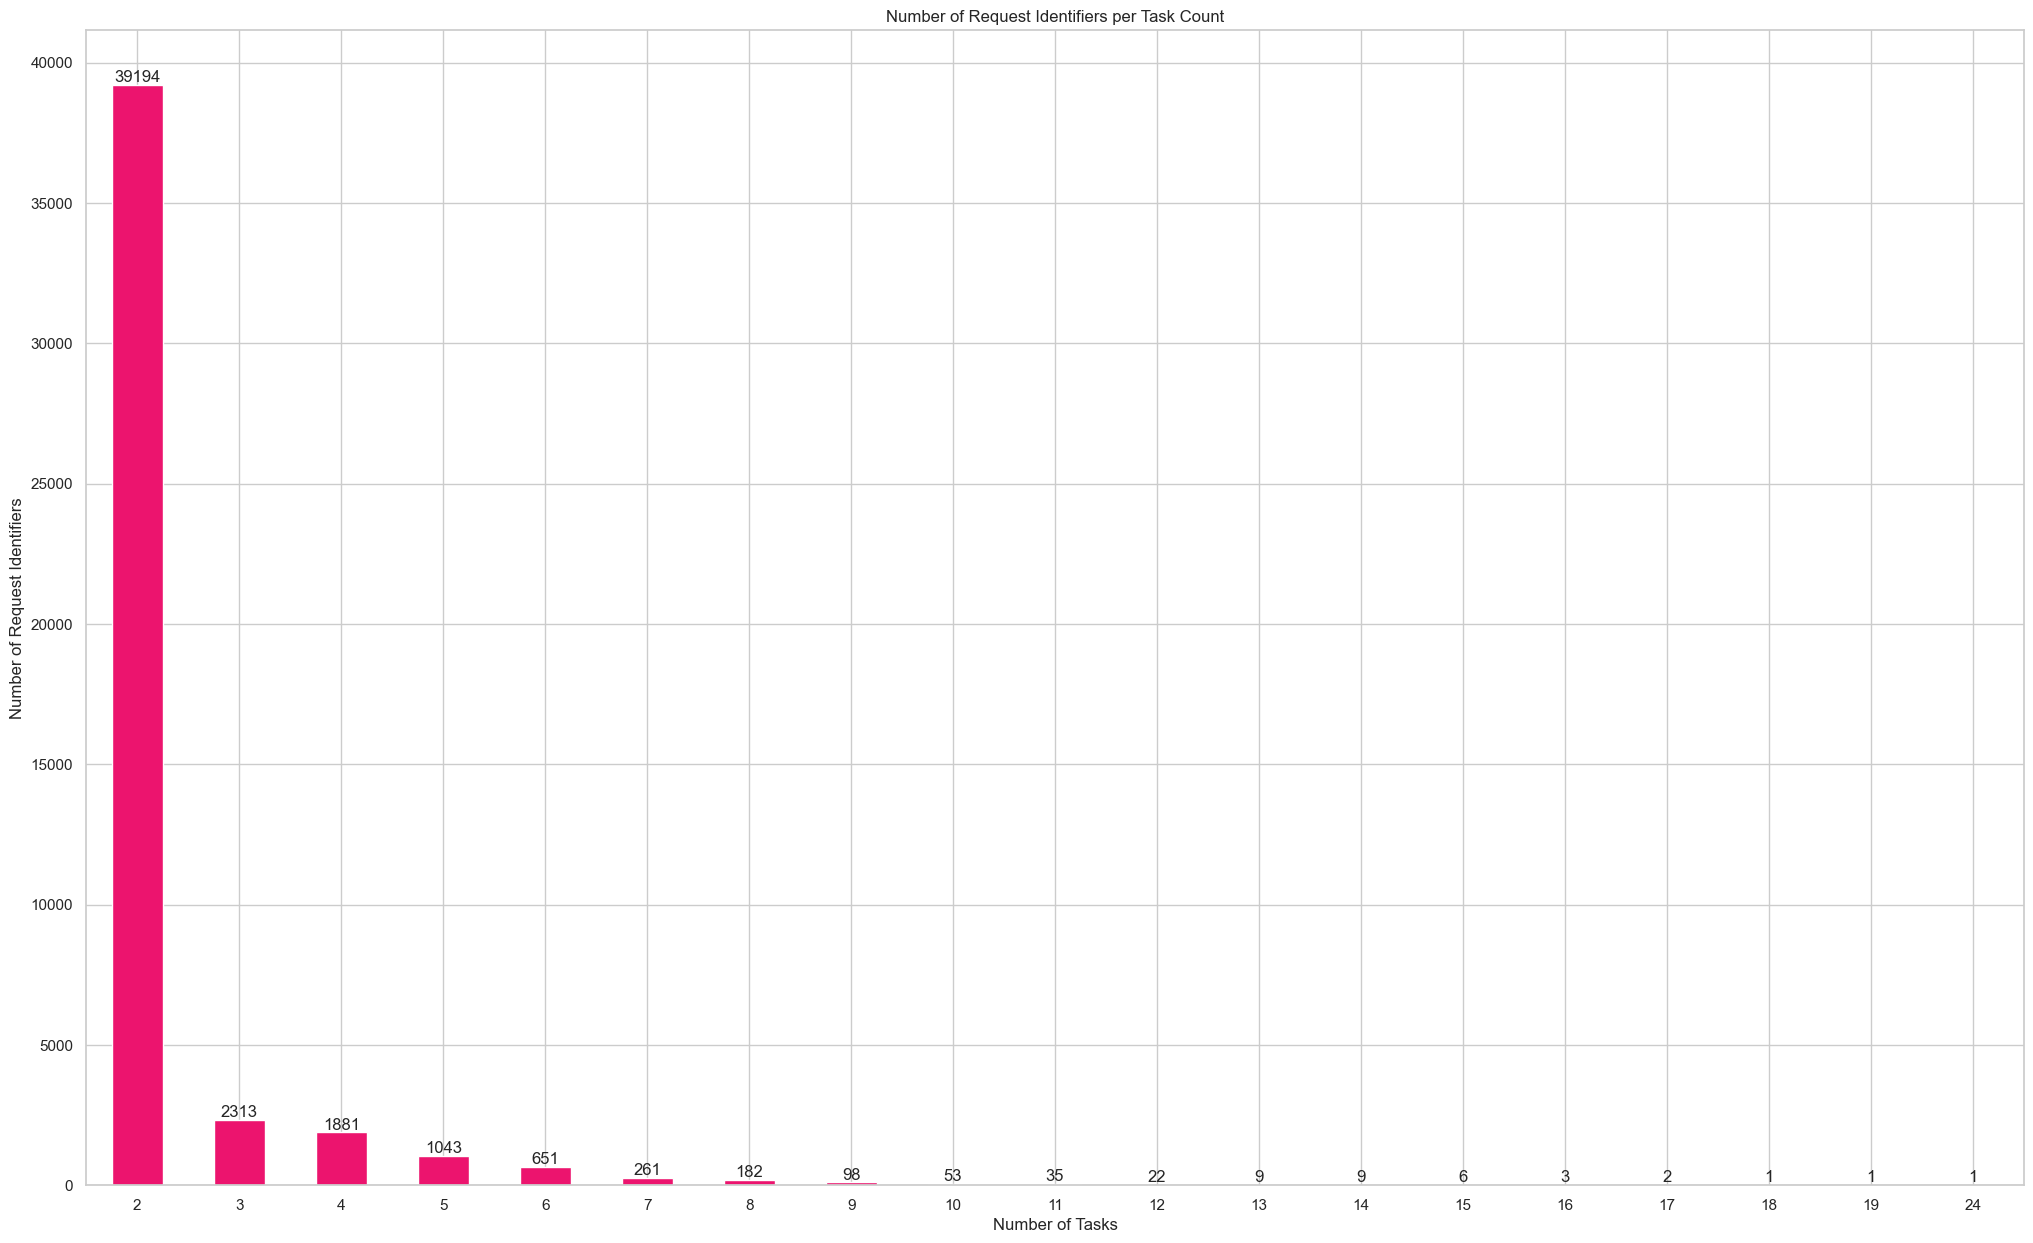

In [113]:
# Number of Request Identifiers per Task Count

# store the counts of 'Task Id' per 'Request Identifier' in 'activity_counts'
activity_counts = filtered_data.groupby('Request Identifier')['Task Id'].count()

# calculate the frequency of each activity count
activity_frequency = activity_counts.value_counts().sort_index()

# set the figure size
plt.figure(figsize=(25, 15))
# plot a bar chart of the activity frequency
activity_frequency.plot(kind='bar', color= '#ec146e')

# each bar with its respective value
for i, value in enumerate(activity_frequency):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12)

# set the title
plt.title('Number of Request Identifiers per Task Count')
# set label for x-axis
plt.xlabel('Number of Tasks')
# set label for y-axis
plt.ylabel('Number of Request Identifiers')
# x-axis keep horizontal -> no rotation
plt.xticks(rotation=0)
# display gridlines
plt.grid(True)
# display the plot
plt.show()

In [114]:
# calculate the count of 'Task Id' for each 'Request Identifier'
request_counts = filtered_data.groupby('Request Identifier')['Task Id'].count()

# get the identifiers where the count of 'Task Id' is less or equal to 9
identifiers_to_keep = request_counts[request_counts <= 9].index

# filter the original DataFrame based on the identifiers to keep
final_filtered_data = filtered_data[filtered_data['Request Identifier'].isin(identifiers_to_keep)]

In [115]:
# check final filtered data
final_filtered_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,...,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,...,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,...,0 days 00:00:00,0,0,5,1,1,299,1,107,request_finished
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,...,0 days 00:00:00.577000,0,0,5,1,1,299,2,107,request_finished
10,1589361,3,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,NaT,100,11029,167,Initial Request,...,0 days 00:00:00,0,0,2,1,1,298,1,102,request_canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208977,6628353,45770,2024-04-01 10:51:50.633,2024-04-01 11:17:40.193,2024-04-01 11:22:17.027,2024-04-01 16:45:07.023,102,10606,1147,Execution,...,0 days 01:06:44.136000,4004,0,5,0,0,299,3,107,request_finished
208980,6728664,45771,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,NaT,100,7945,478,Initial Request,...,0 days 00:00:00,0,0,4,0,0,299,1,107,request_finished
208981,6728665,45771,2024-04-15 18:16:21.570,2024-04-16 08:18:47.537,2024-04-16 08:21:00.047,2024-04-16 15:30:00.643,102,8548,1147,Execution,...,0 days 00:00:00.300000,0,0,4,0,1,299,2,107,request_finished
208984,6847219,45772,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,NaT,100,2243,722,Initial Request,...,0 days 00:00:00,0,0,6,4,4,299,1,107,request_finished


## Preprocessing: Dealing with inconsistencies before encoding

### Drop columns

In [116]:
# check the column of the DataFrame
final_filtered_data.columns

Index(['Task Id', 'Request Identifier', 'Task arrival date',
       'Task capture date', 'Task execution end date',
       'Task predicted end date', 'Actvity ID', 'Task Executer',
       'Task executer department', 'Task Type', 'Action',
       'idBPMApplicationAction', 'idField47', 'idField203', 'idField1602',
       'idField1604', 'idField3388', 'idField3390', 'idField3391',
       'idField3420', 'idField3486', 'idField3491', 'idField3935', 'Sex',
       'BirthYear', 'Role ID', 'Is Manager', 'OrgUnitSince', 'IsOutSourcer',
       'Queue Time', 'On time', 'requeststart', 'requestend', 'relativetime',
       'relativetime_s', 'relativedays', 'numactions', 'weekday_arrival',
       'weekday_exec', 'last_application_action', 'Event_ID', 'last_action',
       'Outcome'],
      dtype='object')

In [117]:
# check data information
final_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106137 entries, 0 to 208985
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Task Id                   106137 non-null  int64          
 1   Request Identifier        106137 non-null  int64          
 2   Task arrival date         106137 non-null  datetime64[ns] 
 3   Task capture date         106137 non-null  datetime64[ns] 
 4   Task execution end date   106137 non-null  datetime64[ns] 
 5   Task predicted end date   60514 non-null   datetime64[ns] 
 6   Actvity ID                106137 non-null  int64          
 7   Task Executer             106137 non-null  object         
 8   Task executer department  106137 non-null  object         
 9   Task Type                 106137 non-null  object         
 10  Action                    53378 non-null   object         
 11  idBPMApplicationAction    106137 non-null  int64         

In [118]:
# set pandas option to display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)

In [119]:
# check final filtered data
final_filtered_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,idField47,idField203,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Queue Time,On time,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,NaN,273,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 17:27:25.940000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN,F,1979.0,5.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00,0,0,5,1,1,299,1,107,request_finished
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,NaN,273,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 00:01:34.056000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00.577000,0,0,5,1,1,299,2,107,request_finished
10,1589361,3,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,NaT,100,11029,167,Initial Request,Submit initial request,270,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,30,10,NaN,10,30,NaN,NaN,F,1975.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-12 18:09:29.153,2022-04-13 13:16:14.933,0 days 00:00:00,0,0,2,1,1,298,1,102,request_canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208977,6628353,45770,2024-04-01 10:51:50.633,2024-04-01 11:17:40.193,2024-04-01 11:22:17.027,2024-04-01 16:45:07.023,102,10606,1147,Execution,NaN,275,2,2024-03-31T23:00:00.000Z,2,100,40,10,60,NaN,30,NaN,50,F,1975.0,11.0,Yes,2023.0,N,0 days 00:25:49.560000,no,2024-04-01 09:45:06.497,2024-04-01 14:32:14.160,0 days 01:06:44.136000,4004,0,5,0,0,299,3,107,request_finished
208980,6728664,45771,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,NaT,100,7945,478,Initial Request,Submit initial request,270,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50,M,1966.0,4.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2024-04-15 18:16:21.270,2024-04-16 09:20:08.637,0 days 00:00:00,0,0,4,0,0,299,1,107,request_finished
208981,6728665,45771,2024-04-15 18:16:21.570,2024-04-16 08:18:47.537,2024-04-16 08:21:00.047,2024-04-16 15:30:00.643,102,8548,1147,Execution,NaN,275,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50,M,1966.0,32.0,Yes,2023.0,N,0 days 14:02:25.967000,no,2024-04-15 18:16:21.270,2024-04-16 09:20:08.637,0 days 00:00:00.300000,0,0,4,0,1,299,2,107,request_finished
208984,6847219,45772,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,NaT,100,2243,722,Initial Request,Submit initial request,270,2,2024-05-01T23:00:00.000Z,2,100,50,50,70,NaN,30,100,NaN,F,1999.0,4.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days 00:00:00,0,0,6,4,4,299,1,107,request_f

In [120]:
# calculate the number of missing values in each column
final_filtered_data.isna().sum()

Task Id                         0
Request Identifier              0
Task arrival date               0
Task capture date               0
Task execution end date         0
Task predicted end date     45623
Actvity ID                      0
Task Executer                   0
Task executer department        0
Task Type                       0
Action                      52759
idBPMApplicationAction          0
idField47                   89599
idField203                      0
idField1602                 90278
idField1604                 91274
idField3388                     0
idField3390                 17511
idField3391                  3141
idField3420                 74780
idField3486                     0
idField3491                 36551
idField3935                 72429
Sex                          5475
BirthYear                    5475
Role ID                      5475
Is Manager                   5475
OrgUnitSince                 5475
IsOutSourcer                 5475
Queue Time    

In [121]:
# create a new variable: 'Arrival Day'
# extract the day of the month from the column 'Task arrival date'
final_filtered_data['Arrival Day'] = final_filtered_data['Task arrival date'].dt.day

In [122]:
# check final filtered data
final_filtered_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,idField47,idField203,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Queue Time,On time,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome,Arrival Day
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished,11
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,NaN,273,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 17:27:25.940000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished,11
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN,F,1979.0,5.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00,0,0,5,1,1,299,1,107,request_finished,12
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,NaN,273,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 00:01:34.056000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00.577000,0,0,5,1,1,299,2,107,request_finished,12
10,1589361,3,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,NaT,100,11029,167,Initial Request,Submit initial request,270,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,30,10,NaN,10,30,NaN,NaN,F,1975.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-12 18:09:29.153,2022-04-13 13:16:14.933,0 days 00:00:00,0,0,2,1,1,298,1,102,request_canceled,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208977,6628353,45770,2024-04-01 10:51:50.633,2024-04-01 11:17:40.193,2024-04-01 11:22:17.027,2024-04-01 16:45:07.023,102,10606,1147,Execution,NaN,275,2,2024-03-31T23:00:00.000Z,2,100,40,10,60,NaN,30,NaN,50,F,1975.0,11.0,Yes,2023.0,N,0 days 00:25:49.560000,no,2024-04-01 09:45:06.497,2024-04-01 14:32:14.160,0 days 01:06:44.136000,4004,0,5,0,0,299,3,107,request_finished,1
208980,6728664,45771,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,NaT,100,7945,478,Initial Request,Submit initial request,270,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50,M,1966.0,4.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2024-04-15 18:16:21.270,2024-04-16 09:20:08.637,0 days 00:00:00,0,0,4,0,0,299,1,107,request_finished,15
208981,6728665,45771,2024-04-15 18:16:21.570,2024-04-16 08:18:47.537,2024-04-16 08:21:00.047,2024-04-16 15:30:00.643,102,8548,1147,Execution,NaN,275,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50,M,1966.0,32.0,Yes,2023.0,N,0 days 14:02:25.967000,no,2024-04-15 18:16:21.270,2024-04-16 09:20:08.637,0 days 00:00:00.300000,0,0,4,0,1,299,2,107,request_finished,15
208984,6847219,45772,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,NaT,100,2243,722,Initial Request,Submit initial request,270,2,2024-05-01T23:00:00.000Z,2,100,50,50,70,NaN,30,100,NaN,F,1999.0,4.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days

### By tasks and not by activities

In [123]:
def encode_tasks(data, task_columns, constant_columns):
    
    # create a DataFrame from the data input
    df = pd.DataFrame(data)
    
    # initialize variable to collect each request's encoded data
    encoded_rows = []
    
    # sort DataFrame by 'Request Identifier' and 'Task arrival date'
    df = df.sort_values(by=['Request Identifier', 'Task arrival date'])
    
    # group by 'Request Identifier' to handle each request in bulk
    grouped = df.groupby('Request Identifier')
    
    # process each group (each unique request)
    for request_id, group in grouped:
        # prepare the encoded row starting with constant values
        encoded_row = {col: group[col].iloc[0] for col in constant_columns}
        
        # process task-specific columns
        for idx, (_, task) in enumerate(group.iterrows(), start=1):
            for column in task_columns:
                encoded_row[f"{column}_{idx}"] = task[column]
        
        # append the prepared row to the list
        encoded_rows.append(encoded_row)
    
    # convert the list of dictionaries to a DataFrame
    encoded_df = pd.DataFrame(encoded_rows)
    
    return encoded_df

In [124]:
# check final filtered data
final_filtered_data

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,Action,idBPMApplicationAction,idField47,idField203,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Queue Time,On time,requeststart,requestend,relativetime,relativetime_s,relativedays,numactions,weekday_arrival,weekday_exec,last_application_action,Event_ID,last_action,Outcome,Arrival Day
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaT,100,7638,569,Initial Request,Submit initial request,270,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN,M,1967.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00,0,0,5,0,0,299,1,107,request_finished,11
1,1584304,1,2022-04-11 16:02:14.743,2022-04-12 09:29:40.683,2022-04-12 10:02:54.687,2022-04-12 14:02:14.803,102,4322,1104,Execution,NaN,273,1,2022-04-10T23:00:00.000Z,1,90,10,NaN,10,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 17:27:25.940000,no,2022-04-11 16:02:13.820,2022-05-10 13:48:44.353,0 days 00:00:00.923000,0,0,5,0,1,299,2,107,request_finished,11
5,1586253,2,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,2022-04-12 10:50:25.570,NaT,100,598,606,Initial Request,Submit initial request,270,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN,F,1979.0,5.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00,0,0,5,1,1,299,1,107,request_finished,12
6,1586254,2,2022-04-12 10:50:26.147,2022-04-12 10:52:00.203,2022-04-12 12:35:56.390,2022-04-13 08:50:26.197,102,4322,1104,Execution,NaN,273,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,10,10,10,20,10,10,NaN,F,1967.0,21.0,No,2024.0,Y,0 days 00:01:34.056000,no,2022-04-12 10:50:25.570,2022-04-12 14:23:32.340,0 days 00:00:00.577000,0,0,5,1,1,299,2,107,request_finished,12
10,1589361,3,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,2022-04-12 18:09:29.153,NaT,100,11029,167,Initial Request,Submit initial request,270,NaN,2022-04-11T23:00:00.000Z,NaN,NaN,30,10,NaN,10,30,NaN,NaN,F,1975.0,5.0,Yes,2021.0,N,0 days 00:00:00,not_applicable,2022-04-12 18:09:29.153,2022-04-13 13:16:14.933,0 days 00:00:00,0,0,2,1,1,298,1,102,request_canceled,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208977,6628353,45770,2024-04-01 10:51:50.633,2024-04-01 11:17:40.193,2024-04-01 11:22:17.027,2024-04-01 16:45:07.023,102,10606,1147,Execution,NaN,275,2,2024-03-31T23:00:00.000Z,2,100,40,10,60,NaN,30,NaN,50,F,1975.0,11.0,Yes,2023.0,N,0 days 00:25:49.560000,no,2024-04-01 09:45:06.497,2024-04-01 14:32:14.160,0 days 01:06:44.136000,4004,0,5,0,0,299,3,107,request_finished,1
208980,6728664,45771,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,2024-04-15 18:16:21.270,NaT,100,7945,478,Initial Request,Submit initial request,270,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50,M,1966.0,4.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2024-04-15 18:16:21.270,2024-04-16 09:20:08.637,0 days 00:00:00,0,0,4,0,0,299,1,107,request_finished,15
208981,6728665,45771,2024-04-15 18:16:21.570,2024-04-16 08:18:47.537,2024-04-16 08:21:00.047,2024-04-16 15:30:00.643,102,8548,1147,Execution,NaN,275,1,2024-04-11T23:00:00.000Z,1,90,30,20,60,NaN,30,NaN,50,M,1966.0,32.0,Yes,2023.0,N,0 days 14:02:25.967000,no,2024-04-15 18:16:21.270,2024-04-16 09:20:08.637,0 days 00:00:00.300000,0,0,4,0,1,299,2,107,request_finished,15
208984,6847219,45772,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,2024-05-03 15:33:43.773,NaT,100,2243,722,Initial Request,Submit initial request,270,2,2024-05-01T23:00:00.000Z,2,100,50,50,70,NaN,30,100,NaN,F,1999.0,4.0,Yes,2023.0,N,0 days 00:00:00,not_applicable,2024-05-03 15:33:43.773,2024-05-07 08:50:59.667,0 days

### Other variables

In [125]:
# convert the column 'idField203' to datetime format
final_filtered_data['idField203'] = pd.to_datetime(final_filtered_data['idField203'], errors='coerce')

# create a new column: 'idField203_day' -> extracting the day from the column 'idField203'
final_filtered_data['idField203_day']=final_filtered_data['idField203'].dt.day

# create a new column: 'idField203_month' -> extracting the month from the column 'idField203' 
final_filtered_data['idField203_month']=final_filtered_data['idField203'].dt.month

In [126]:
# create a new column: 'OrgUnitDuration' -> calculating the duration of the organization unit
final_filtered_data['OrgUnitDuration'] = 2024 - final_filtered_data['OrgUnitSince']

# create a new column: 'Age' -> calculating the age of individuals
final_filtered_data['Age'] = 2024 - final_filtered_data['BirthYear']

### Dummy variables

In [127]:
# 'Is Manager' column: replace 'Yes' with 1 and 'No' with 0
final_filtered_data['Is Manager'].replace('Yes',1,inplace=True)
final_filtered_data['Is Manager'].replace('No',0,inplace=True)

# 'IsOutSourcer' column: replace 'Y' with 1 and 'N' with 0
final_filtered_data['IsOutSourcer'].replace('Y',1,inplace=True)
final_filtered_data['IsOutSourcer'].replace('N',0,inplace=True)

# 'Outcome' column: replace outcome labels with numeric values
final_filtered_data['Outcome'].replace('request_finished',0,inplace=True)
final_filtered_data['Outcome'].replace('request_canceled',1,inplace=True)
final_filtered_data['Outcome'].replace('others',2,inplace=True)
final_filtered_data['Outcome'].replace('closed_administratively',3,inplace=True)

### Encoding

In [128]:
def split_encoded_dataframe(encoded_df, c_columns, max_activities=8):
    """
    Split the encoded DataFrame into multiple DataFrames based on the activity count.
    
    Parameters:
    encoded_df (pd.DataFrame): The encoded DataFrame containing all activities.
    max_activities (int): The maximum number of activities to consider.
    
    Returns:
    dict: A dictionary of DataFrames split by activity count.
    """
    # dictionary to hold the resulting split DataFrames
    dataframes = {}
    # base columns to always include in each split DataFrame
    base_columns = ['Request Identifier'] + [col for col in c_columns]
    
    # iterate through each prefix (number of activities) from 1 to max_activities
    for i in range(1, max_activities + 1):
        # initialize a list to hold columns for the current prefix
        columns_to_include = base_columns.copy()
        
        # add columns for each activity up to the current prefix
        for j in range(1, i + 1):
            activity_columns = [col for col in encoded_df.columns if f'_{j}' in col]
            columns_to_include.extend(activity_columns)
        
        # ensure columns are unique and maintain order
        columns_to_include = list(dict.fromkeys(columns_to_include))
        
        # filter the DataFrame to include only the necessary columns
        filtered_df = encoded_df[columns_to_include].copy()
        
        # add filtered DataFrame to the dictionary with a key indicating the prefix
        dataframes[f'prefix_{i}'] = filtered_df
    
    return dataframes

In [129]:
def clean_activity_data(df, prefix_number, valid_activities):
    """
    Remove rows based on 'Activity ID' conditions for a specified prefix level.
    
    :param df: DataFrame to be processed.
    :param prefix_number: The current prefix level (e.g., 4 for 'prefix_4').
    :param valid_activities: List of valid activity IDs to retain.
    :return: DataFrame with rows filtered based on the specified conditions.
    """
    # define the column name based on the prefix number
    activity_column = f"Actvity ID_{prefix_number}"
    
    # drop rows where activity ID is NaN
    filtered_df = df.dropna(subset=[activity_column])
    # keep only the rows where activity ID is in the list of valid activities
    filtered_df = filtered_df[filtered_df[activity_column].isin(valid_activities)]
    
    return filtered_df

In [130]:
def apply_transformations(dataframes, valid_activities, columns_to_keep, base_columns):
    """
    Apply column filtering and activity data cleaning to each DataFrame in a dictionary,
    keeping the same specified columns for the last prefix while retaining all columns
    from previous prefixes.
    
    :param dataframes: Dictionary of DataFrames indexed by prefix keys ('prefix_1', 'prefix_2', etc.).
    :param valid_activities: List of valid activity IDs to retain.
    :param columns_to_keep: List of column names to keep for the last occurring prefix in each DataFrame.
    :return: Updated dictionary with transformed DataFrames.
    """
    
    # iterate over each item in the dictionary
    for key, df in dataframes.items():
        # extract the prefix number from the key
        prefix_number = int(key.split('_')[1])
        
        # initialize an empty list to store the names of the columns to retain
        columns_to_retain = base_columns.copy()

        # iterate through each prefix up to the current one
        for prefix in range(1, prefix_number + 1):
            if prefix < prefix_number:
                # add all columns for previous prefixes
                columns_to_retain += [col for col in df.columns if col.endswith(f"_{prefix}")]
            else:
                # for the current prefix, only add the specified columns
                columns_to_retain += [col for col in df.columns if col.endswith(f"_{prefix}") and col.rsplit('_', 1)[0] in columns_to_keep]

        # filter the DataFrame to only include the retained columns
        dff = df[columns_to_retain]

        # apply the clean_activity_data function -> clean the activity data for the current prefix
        dff = clean_activity_data(dff, prefix_number, valid_activities)
        
        # update the dictionary with the transformed DataFrame
        dataframes[key] = dff
    
    return dataframes

In [131]:
# specify the columns to include for each task
task_columns = ['Actvity ID', 'Task Executer', 'Role ID', 'Is Manager', 'OrgUnitDuration','Age','Sex', 'IsOutSourcer','On time', 'Task executer department', 'idBPMApplicationAction', 'weekday_exec', 'weekday_arrival', 'relativetime_s', 'relativedays', 'Arrival Day']  # Specify the columns you want to include for each task

# specify the columns constant for each request
constant_columns = ['Request Identifier',  'Outcome', 'idField47','idField203_day','idField203_month', 'idField1602', 'idField1604', 'idField3388', 'idField3390', 'idField3391', 'idField3420', 'idField3486', 'idField3491', 'idField3935']  # Specify the columns that are constant for each request

# encode the dataset using the specified task and constant columns
encoded_dataset = encode_tasks(final_filtered_data, task_columns, constant_columns)

In [132]:
# check the encoded dataset
encoded_dataset

,Request Identifier,Outcome,idField47,idField203_day,idField203_month,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Actvity ID_1,Task Executer_1,Role ID_1,Is Manager_1,OrgUnitDuration_1,Age_1,Sex_1,IsOutSourcer_1,On time_1,Task executer department_1,idBPMApplicationAction_1,weekday_exec_1,weekday_arrival_1,relativetime_s_1,relativedays_1,Arrival Day_1,Actvity ID_2,Task Executer_2,Role ID_2,Is Manager_2,OrgUnitDuration_2,Age_2,Sex_2,IsOutSourcer_2,On time_2,Task executer department_2,idBPMApplicationAction_2,weekday_exec_2,weekday_arrival_2,relativetime_s_2,relativedays_2,Arrival Day_2,Actvity ID_3,Task Executer_3,Role ID_3,Is Manager_3,OrgUnitDuration_3,Age_3,Sex_3,IsOutSourcer_3,On time_3,Task executer department_3,idBPMApplicationAction_3,weekday_exec_3,weekday_arrival_3,relativetime_s_3,relativedays_3,Arrival Day_3,Actvity ID_4,Task Executer_4,Role ID_4,Is Manager_4,OrgUnitDuration_4,Age_4,Sex_4,IsOutSourcer_4,On time_4,Task executer department_4,idBPMApplicationAction_4,weekday_exec_4,weekday_arrival_4,relativetime_s_4,relativedays_4,Arrival Day_4,Actvity ID_5,Task Executer_5,Role ID_5,Is Manager_5,OrgUnitDuration_5,Age_5,Sex_5,IsOutSourcer_5,On time_5,Task executer department_5,idBPMApplicationAction_5,weekday_exec_5,weekday_arrival_5,relativetime_s_5,relativedays_5,Arrival Day_5,Actvity ID_6,Task Executer_6,Role ID_6,Is Manager_6,OrgUnitDuration_6,Age_6,Sex_6,IsOutSourcer_6,On time_6,Task executer department_6,idBPMApplicationAction_6,weekday_exec_6,weekday_arrival_6,relativetime_s_6,relativedays_6,Arrival Day_6,Actvity ID_7,Task Executer_7,Role ID_7,Is Manager_7,OrgUnitDuration_7,Age_7,Sex_7,IsOutSourcer_7,On time_7,Task executer department_7,idBPMApplicationAction_7,weekday_exec_7,weekday_arrival_7,relativetime_s_7,relativedays_7,Arrival Day_7,Actvity ID_8,Task Executer_8,Role ID_8,Is Manager_8,OrgUnitDuration_8,Age_8,Sex_8,IsOutSourcer_8,On time_8,Task executer department_8,idBPMApplicationAction_8,weekday_exec_8,weekday_arrival_8,relativetime_s_8,relativedays_8,Arrival Day_8,Actvity ID_9,Task Executer_9,Role ID_9,Is Manager_9,OrgUnitDuration_9,Age_9,Sex_9,IsOutSourcer_9,On time_9,Task executer department_9,idBPMApplicationAction_9,weekday_exec_9,weekday_arrival_9,relativetime_s_9,relativedays_9,Arrival Day_9
0,1,0,1,10,4,1,90,10,NaN,10,20,10,10,NaN,100,7638,5.0,1.0,3.0,57.0,M,0.0,not_applicable,569,270,0,0,0,0,11,102,4322,21.0,0.0,0.0,57.0,F,1.0,no,1104,273,1,0,0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,NaN,11,4,NaN,NaN,10,10,10,20,10,10,NaN,100,598,5.0,1.0,1.0,45.0,F,0.0,not_applicable,606,270,1,1,0,0,12,102,4322,21.0,0.0,0.0,57.0,F,1.0,no,1104,273,1,1,0,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,NaN,11,4,NaN,NaN,30,10,NaN,10,30,NaN,NaN,100,11029,5.0,1.0,3.0,49.0,F,0.0,not_applicable,167,270,1,1,0,0,12,102,11029,5.0,1.0,3.0,49.0,F,0.0,no,167,298,2,1,0,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [133]:
# encoded_dataset[~encoded_dataset['Actvity ID_8'].isna()] 
# its perfect

In [134]:
# split the encoded DataFrame into multiple DataFrames based on activity count
activity_dataframes = split_encoded_dataframe(encoded_dataset, constant_columns, max_activities=9)

# Display the first few rows of each encoded DataFrame for verification
# for key, df in activity_dataframes.items():
#     print(f'\nEncoded DataFrame {key}:\n', df.head())
    
# Save the encoded DataFrames to CSV files if needed
# for key, df in activity_dataframes.items():
#     df.to_csv(f'{key}_encoded.csv', index=False)

In [135]:
# check the DataFrame: 'prefix_9'
activity_dataframes['prefix_9']

,Request Identifier,Outcome,idField47,idField203_day,idField203_month,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Actvity ID_1,Task Executer_1,Role ID_1,Is Manager_1,OrgUnitDuration_1,Age_1,Sex_1,IsOutSourcer_1,On time_1,Task executer department_1,idBPMApplicationAction_1,weekday_exec_1,weekday_arrival_1,relativetime_s_1,relativedays_1,Arrival Day_1,Actvity ID_2,Task Executer_2,Role ID_2,Is Manager_2,OrgUnitDuration_2,Age_2,Sex_2,IsOutSourcer_2,On time_2,Task executer department_2,idBPMApplicationAction_2,weekday_exec_2,weekday_arrival_2,relativetime_s_2,relativedays_2,Arrival Day_2,Actvity ID_3,Task Executer_3,Role ID_3,Is Manager_3,OrgUnitDuration_3,Age_3,Sex_3,IsOutSourcer_3,On time_3,Task executer department_3,idBPMApplicationAction_3,weekday_exec_3,weekday_arrival_3,relativetime_s_3,relativedays_3,Arrival Day_3,Actvity ID_4,Task Executer_4,Role ID_4,Is Manager_4,OrgUnitDuration_4,Age_4,Sex_4,IsOutSourcer_4,On time_4,Task executer department_4,idBPMApplicationAction_4,weekday_exec_4,weekday_arrival_4,relativetime_s_4,relativedays_4,Arrival Day_4,Actvity ID_5,Task Executer_5,Role ID_5,Is Manager_5,OrgUnitDuration_5,Age_5,Sex_5,IsOutSourcer_5,On time_5,Task executer department_5,idBPMApplicationAction_5,weekday_exec_5,weekday_arrival_5,relativetime_s_5,relativedays_5,Arrival Day_5,Actvity ID_6,Task Executer_6,Role ID_6,Is Manager_6,OrgUnitDuration_6,Age_6,Sex_6,IsOutSourcer_6,On time_6,Task executer department_6,idBPMApplicationAction_6,weekday_exec_6,weekday_arrival_6,relativetime_s_6,relativedays_6,Arrival Day_6,Actvity ID_7,Task Executer_7,Role ID_7,Is Manager_7,OrgUnitDuration_7,Age_7,Sex_7,IsOutSourcer_7,On time_7,Task executer department_7,idBPMApplicationAction_7,weekday_exec_7,weekday_arrival_7,relativetime_s_7,relativedays_7,Arrival Day_7,Actvity ID_8,Task Executer_8,Role ID_8,Is Manager_8,OrgUnitDuration_8,Age_8,Sex_8,IsOutSourcer_8,On time_8,Task executer department_8,idBPMApplicationAction_8,weekday_exec_8,weekday_arrival_8,relativetime_s_8,relativedays_8,Arrival Day_8,Actvity ID_9,Task Executer_9,Role ID_9,Is Manager_9,OrgUnitDuration_9,Age_9,Sex_9,IsOutSourcer_9,On time_9,Task executer department_9,idBPMApplicationAction_9,weekday_exec_9,weekday_arrival_9,relativetime_s_9,relativedays_9,Arrival Day_9
0,1,0,1,10,4,1,90,10,NaN,10,20,10,10,NaN,100,7638,5.0,1.0,3.0,57.0,M,0.0,not_applicable,569,270,0,0,0,0,11,102,4322,21.0,0.0,0.0,57.0,F,1.0,no,1104,273,1,0,0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,NaN,11,4,NaN,NaN,10,10,10,20,10,10,NaN,100,598,5.0,1.0,1.0,45.0,F,0.0,not_applicable,606,270,1,1,0,0,12,102,4322,21.0,0.0,0.0,57.0,F,1.0,no,1104,273,1,1,0,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,NaN,11,4,NaN,NaN,30,10,NaN,10,30,NaN,NaN,100,11029,5.0,1.0,3.0,49.0,F,0.0,not_applicable,167,270,1,1,0,0,12,102,11029,5.0,1.0,3.0,49.0,F,0.0,no,167,298,2,1,0,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [136]:
# list of valid activities
valid_activities = [100, 102, 105]

# columns to keep for the last prefix of each DataFrame
columns_keep = ['Actvity ID', 'Arrival Day', 'weekday_arrival']

# apply the transformations to the dictionary of DataFrames
transformed_dataframes = apply_transformations(activity_dataframes, valid_activities, columns_keep, constant_columns)

In [137]:
# display the keys of the dictionary with the transformed DataFrames22
print(transformed_dataframes.keys())

dict_keys(['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8', 'prefix_9'])


In [138]:
# calculate the number of missing values in the column 'Actvity ID_4' of the transformed DataFrame 'prefix_4'
transformed_dataframes['prefix_4']['Actvity ID_4'].isna().sum()

0

In [139]:
# check the transformed DataFrame: 'prefix_3'
transformed_dataframes['prefix_3']

,Request Identifier,Outcome,idField47,idField203_day,idField203_month,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Actvity ID_1,Task Executer_1,Role ID_1,Is Manager_1,OrgUnitDuration_1,Age_1,Sex_1,IsOutSourcer_1,On time_1,Task executer department_1,idBPMApplicationAction_1,weekday_exec_1,weekday_arrival_1,relativetime_s_1,relativedays_1,Arrival Day_1,Actvity ID_2,Task Executer_2,Role ID_2,Is Manager_2,OrgUnitDuration_2,Age_2,Sex_2,IsOutSourcer_2,On time_2,Task executer department_2,idBPMApplicationAction_2,weekday_exec_2,weekday_arrival_2,relativetime_s_2,relativedays_2,Arrival Day_2,Actvity ID_3,weekday_arrival_3,Arrival Day_3
3,4,1,NaN,12,4,NaN,NaN,10,10,NaN,20,10,NaN,NaN,100,924,6.0,1.0,4.0,41.0,M,0.0,not_applicable,569,270,2,2,0,0,13,102,538,30.0,1.0,10.0,44.0,M,0.0,no,1301,290,2,2,0,0,13,102.0,2.0,20.0
4,5,2,NaN,5,4,NaN,NaN,20,30,10,10,30,20,NaN,100,8601,5.0,1.0,3.0,58.0,M,0.0,not_applicable,167,270,2,2,0,0,13,102,507,11.0,1.0,7.0,44.0,M,0.0,no,1336,290,3,2,1,0,13,102.0,3.0,21.0
5,6,2,NaN,12,4,NaN,NaN,20,30,10,10,30,20,NaN,100,11029,5.0,1.0,3.0,49.0,F,0.0,not_applicable,167,270,2,2,0,0,13,102,507,11.0,1.0,7.0,44.0,M,0.0,no,1336,290,3,2,0,0,13,102.0,3.0,28.0
6,7,2,NaN,6,4,NaN,NaN,30,30,10,10,30,70,NaN,100,11029,5.0,1.0,3.0,49.0,F,0.0,not_applicable,167,270,2,2,0,0,13,102,507,11.0,1.0,7.0,44.0,M,0.0,no,1336,290,3,2,1,0,13,102.0,3.0,28.0
12,13,3,NaN,13,4,NaN,NaN,10,60,10,10,30,10,NaN,100,10847,6.0,1.0,0.0,49.0,M,0.0,not_applicable,606,270,3,3,0,0,14,102,507,11.0,1.0,7.0,44.0,M,0.0,no,1336,290,3,3,2,0,14,102.0,3.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45611,45761,3,NaN,31,3,NaN,NaN,50,100,70,NaN,50,10,NaN,100,10123,5.0,1.0,3.0,53.0,F,0.0,not_applicable,161,270,0,0,0,0,1,102,6266,21.0,0.0,1.0,34.0,M,1.0,no,1146,290,0,0,0,0,1,102.0,0.0,1.0
45615,45765,3,NaN,28,3,NaN,NaN,10,100,70,NaN,50,90,50,100,8178,5.0,1.0,1.0,57.0,M,0.0,not_applicable,523,270,0,0,0,0,1,102,6266,21.0,0.0,1.0,34.0,M,1.0,no,1146,290,0,0,0,0,1,102.0,0.0,1.0
45616,45766,0,NaN,31,3,NaN,NaN,20,10,60,NaN,30,NaN,50,100,10653,5.0,1.0,2.0,47.0,F,0.0,not_applicable,235,270,0,0,0,0,1,102,6266,21.0,0.0,1.0,34.0,M,1.0,no,1146,290,0,0,0,0,1,102.0,0.0,1.0
45618,45768,3,NaN,31,3,NaN,NaN,50,10,70,NaN,50,10,NaN,100,610,5.0,1.0,1.0,46.0,F,0.0,not_applicable,453,270,0,0,0,0,1,102,6266,21.0,0.0,1.0,34.0,M,1.0,no,1146,290,0,0,3,0,1,102.0,0.0,1.0


In [140]:
# calculate the number of missing values in each column in the 'filtered_data' DataFrame
filtered_data.isna().sum()

Task Id                         0
Request Identifier              0
Task arrival date               0
Task capture date               0
Task execution end date         0
Task predicted end date     45765
Actvity ID                      0
Task Executer                   0
Task executer department        0
Task Type                       0
Action                      53746
idBPMApplicationAction          0
idField47                   90820
idField203                      0
idField1602                 91525
idField1604                 92604
idField3388                     0
idField3390                 17521
idField3391                  3155
idField3420                 76344
idField3486                     0
idField3491                 36824
idField3935                 73384
Sex                          5528
BirthYear                    5528
Role ID                      5528
Is Manager                   5528
OrgUnitSince                 5528
IsOutSourcer                 5528
Queue Time    

In [141]:
# calculate the value counts of the column 'Actvity ID_2' in the 'prefix_6' DataFrame
transformed_dataframes['prefix_6']['Actvity ID_2'].value_counts()

Actvity ID_2
102    941
105     32
Name: count, dtype: int64

# 7. Feature Selection

## 7.1 Spliting each product's data set in training and validation

In [142]:
def process_and_split_dataframes(activity_dataframes, test_size=0.3, random_state=42):
    """
    Process each DataFrame in the activity_dataframes dictionary, apply train_test_split,
    and return the corresponding training and validation sets with the suffix indicating the prefix number.

    :param activity_dataframes: Dictionary of DataFrames where keys are 'prefix_' followed by a number.
    :param test_size: Proportion of the dataset to include in the validation split.
    :param random_state: Random seed for reproducibility.
    :return: Four dictionaries containing X_train, y_train, X_val, y_val for each prefix number.
    """
    
    # initialize dictionaries to store train and validation sets
    X_train_dict = {}
    y_train_dict = {}
    X_val_dict = {}
    y_val_dict = {}

    # iterate over each DataFrame in the dictionary
    for key, df in activity_dataframes.items():
        # extract the prefix number from the key
        prefix_number = key.split('_')[-1]

        # split the DataFrame into train and validation sets
        # if 'Outcome' column is present -> use stratification 
        train, val = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['Outcome'] if 'Outcome' in df else None)

        # separate features and target for train set
        X_train = train.drop(columns=['Outcome'])
        y_train = train['Outcome']
        # separate features and target for validation set
        X_val = val.drop(columns=['Outcome'])
        y_val = val['Outcome']

        # store the results in the corresponding dictionaries with the prefix number as the key
        X_train_dict[f'prefix_{prefix_number}'] = X_train
        y_train_dict[f'prefix_{prefix_number}'] = y_train
        X_val_dict[f'prefix_{prefix_number}'] = X_val
        y_val_dict[f'prefix_{prefix_number}'] = y_val

    return X_train_dict, y_train_dict, X_val_dict, y_val_dict

X_train_dict, y_train_dict, X_val_dict, y_val_dict = process_and_split_dataframes(activity_dataframes, test_size=0.3, random_state=42)

In [143]:
def convert_except_columns_to_str_dict(X_t_dict, X_v_dict):
    """
    Apply conversion of columns to strings except specified columns in all DataFrames within the dictionaries.

    :param X_t_dict: Dictionary of X_train DataFrames.
    :param X_v_dict: Dictionary of X_val DataFrames.
    :return: Updated dictionaries with converted DataFrames.
    """
    
    for key in X_t_dict.keys():
        # set 'Request Identifier' as the index for X_train and X_val
        X_train = X_t_dict[key].set_index('Request Identifier')
        X_val = X_v_dict[key].set_index('Request Identifier')
        
        # list of column names not to convert
        columns_not_to_convert = [col for col in X_train.columns if col.startswith(('relativetime_s', 'relativedays'))]
        
        # list of columns to convert by excluding the above ones (not to convert)
        columns_to_convert = [col for col in X_train.columns if col not in columns_not_to_convert]
        
        # convert columns to string, preserving NaNs
        for col in columns_to_convert:
            X_train[col] = X_train[col].astype(str).replace('nan', np.nan)
            X_val[col] = X_val[col].astype(str).replace('nan', np.nan)
        
        # use SimpleImputer to fill missing values with the most frequent value
        imputer = SimpleImputer(strategy='most_frequent')
        X_train[columns_to_convert] = imputer.fit_transform(X_train[columns_to_convert])
        X_val[columns_to_convert] = imputer.transform(X_val[columns_to_convert])
        
        # reset index -> include 'Request Identifier' back as a column
        X_t_dict[key] = X_train.reset_index()
        X_v_dict[key] = X_val.reset_index()
    
    return X_t_dict, X_v_dict

X_train_dict, X_val_dict = convert_except_columns_to_str_dict(X_train_dict, X_val_dict)

In [144]:
# check 'prefix_3' DataFrame from the X_train_dict dictionary
X_train_dict['prefix_3']

,Request Identifier,idField47,idField203_day,idField203_month,idField1602,idField1604,idField3388,idField3390,idField3391,idField3420,idField3486,idField3491,idField3935,Actvity ID_1,Task Executer_1,Role ID_1,Is Manager_1,OrgUnitDuration_1,Age_1,Sex_1,IsOutSourcer_1,On time_1,Task executer department_1,idBPMApplicationAction_1,weekday_exec_1,weekday_arrival_1,relativetime_s_1,relativedays_1,Arrival Day_1,Actvity ID_2,Task Executer_2,Role ID_2,Is Manager_2,OrgUnitDuration_2,Age_2,Sex_2,IsOutSourcer_2,On time_2,Task executer department_2,idBPMApplicationAction_2,weekday_exec_2,weekday_arrival_2,relativetime_s_2,relativedays_2,Arrival Day_2,Actvity ID_3,weekday_arrival_3,Arrival Day_3
0,40608,2,11,12,2,100,40,10,70,30,30,10,10,100,10104,12.0,1.0,4.0,52.0,F,0.0,not_applicable,297,270,1,1,0,0,12,102,8548,32.0,1.0,1.0,58.0,M,0.0,no,1147,290,1,1,0,0,12,102.0,1.0,12.0
1,39901,2,28,11,2,100,50,10,60,30,50,100,10,100,1630,1.0,1.0,0.0,28.0,F,0.0,not_applicable,689,270,1,1,0,0,28,102,10606,11.0,1.0,1.0,49.0,F,0.0,no,1147,290,1,1,0,0,28,102.0,1.0,28.0
2,43928,2,14,2,2,100,30,100,70,30,10,90,10,100,9997,5.0,1.0,2.0,54.0,M,0.0,not_applicable,288,270,2,2,0,0,14,102,11193,32.0,1.0,1.0,49.0,F,0.0,no,1147,290,2,2,0,0,14,102.0,2.0,14.0
3,45074,2,11,3,2,100,50,20,70,30,10,10,10,100,10439,5.0,1.0,1.0,50.0,M,0.0,not_applicable,165,270,1,1,0,0,12,102,6266,21.0,0.0,1.0,34.0,M,1.0,no,1146,290,1,1,0,0,12,102.0,1.0,12.0
4,16269,2,26,12,2,100,40,10,70,30,30,100,10,100,1251,6.0,1.0,3.0,40.0,F,0.0,not_applicable,104,270,4,4,0,0,30,102,4960,21.0,0.0,1.0,46.0,F,1.0,no,1146,290,4,4,1,0,30,102.0,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,44571,2,29,2,2,100,50,100,60,30,50,100,50,100,2216,4.0,1.0,1.0,25.0,M,0.0,not_applicable,212,270,3,3,0,0,29,102,11193,32.0,1.0,1.0,49.0,F,0.0,no,1147,290,3,3,0,0,29,102.0,3.0,29.0
2698,36552,2,19,9,2,100,50,10,70,30,30,100,10,100,10167,5.0,1.0,12.0,52.0,F,0.0,not_applicable,702,270,2,2,0,0,20,102,4960,21.0,0.0,0.0,46.0,F,1.0,no,1146,290,2,2,8,0,20,102.0,2.0,20.0
2699,34801,2,27,8,2,100,30,10,60,30,50,100,10,100,10315,5.0,1.0,1.0,48.0,F,0.0,not_applicable,512,270,0,0,0,0,28,102,4731,21.0,0.0,1.0,52.0,F,1.0,no,1146,290,0,0,0,0,28,102.0,0.0,28.0
2700,31947,2,25,7,2,100,50,10,60,30,30,100,50,100,7814,4.0,1.0,3.0,56.0,M,0.0,not_applicable,525,270,2,2,0,0,26,102,4731,21.0,0.0,1.0,52.0,F,1.0,no,1146,290,2,2,0,0,26,102.0,2.0,26.0


# Encoding

In [145]:
# !pip install category_encoders

# function to perform binary encoding on a specified column of a DataFrame
def binary_encoding(df, column):
    # create a BinaryEncoder object
    encoder = BinaryEncoder(cols=[column])
    # fit the encoder to the DataFrame -> transform the column
    df = encoder.fit_transform(df)
    # create a mapping dictionary -> map original labels to new binary encoded column names
    mapping = {idx: label for idx, label in enumerate(encoder.get_feature_names())}
    # return the transformed DataFrame and the mapping dictionary
    return df, mapping

# function to perform one-hot encoding on a specified column of a DataFrame
def one_hot_encoding(df, column):
    # create a OneHotEncoder object
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
    # fit the encoder -> transform the column
    transformed = encoder.fit_transform(df[[column]])
    # drop the original column from the DataFrame
    df = df.drop(column, axis=1)
    # create new column names for the one-hot encoded features
    cols = [f"{column}_{val}" for val in encoder.categories_[0]]
    # add the new one-hot encoded columns
    df[cols] = transformed
    # create a mapping dictionary -> map original labels to new one-hot encoded column names
    mapping = dict(zip(encoder.categories_[0], cols))
    # return the transformed DataFrame and the mapping dictionary
    return df, mapping

# function to perform label encoding on a specified column of a DataFrame
def label_encoding(df, column):
    # create a LabelEncoder object
    le = LabelEncoder()
    # fit the encoder -> transform the specified column
    df[column] = le.fit_transform(df[column])
    # create a mapping dictionary -> map original labels to new label encoded values
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    # return the transformed DataFrame and the mapping dictionary
    return df, mapping

In [146]:
# Function to apply encodings to a DataFrame (excluding specified columns and using existing mappings if provided)2

def apply_encodings(df, exclude_columns, existing_mappings=None):
    # initialize mappings with existing mappings, otherwise use an empty dictionary
    mappings = existing_mappings if existing_mappings else {}
    
    # make a copy -> avoid modifying the original DataFrame
    df_encoded = df.copy()
    
    # iterate through a copy of the column list -> safely modify the DataFrame
    for column in list(df_encoded.columns):
        # skip encoding and any modifications for specified columns
        if column in exclude_columns:
            continue
        
        # drop columns with unique values equal to the number of rows or with only 1 unique value
        unique = df_encoded[column].nunique()
        if unique == df_encoded.shape[0]: 
            df_encoded.drop(columns=column, inplace=True)
            continue
        if unique == 1:
            df_encoded.drop(columns=column, inplace=True)
            continue

        # If a mapping exists for the column -> apply it
        if column in mappings: 
            # for label enconding
            if isinstance(mappings[column], dict):
                # map the column values using the provided mapping dictionary
                df_encoded[column] = df_encoded[column].map(mappings[column])  #handle unseen as missing (-1)
            
            # for one-hot/binary encoding
            elif isinstance(mappings[column], list):
                # initialize an array for transformed values
                transformed = np.zeros((df_encoded.shape[0], len(mappings[column])), dtype=int)
                # create binary columns based on the existing mappings
                for idx, category in enumerate(mappings[column]):
                    transformed[:, idx] = (df_encoded[column] == category).astype(int)
                # drop the original column and add the new binary columns
                df_encoded.drop(column, axis=1, inplace=True)
                for idx, new_col in enumerate(mappings[column]):
                    df_encoded[new_col] = transformed[:, idx]
                    
        else:
            # determine the type of encoding based on the number of unique values
            unique_values = df_encoded[column].nunique()
            if unique_values == 2:
                # apply binary encoding for binary columns
                df_encoded, new_mapping = binary_encoding(df_encoded, column)
            elif unique_values < 10:
                # apply one-hot encoding for columns with fewer than 10 unique values
                df_encoded, new_mapping = one_hot_encoding(df_encoded, column)
            else:
                # apply label encoding for columns with 10 or more unique values
                df_encoded, new_mapping = label_encoding(df_encoded, column)
            # update the mappings dictionary with the new mapping
            mappings[column] = new_mapping
    
    # return the encoded DataFrame and the updated mappings
    return df_encoded, mappings

In [147]:
# Function to align the columns of the validation dataset with the train dataset
def align_datasets(df_train, df_val):
    # iterate through the columns of the train dataset
    for column in df_train.columns:
        # add missing columns to the validation set -> default value of 0
        if column not in df_val.columns:
            df_val[column] = 0
    
    # ensure the order of columns in the validation set matches the train set
    df_val = df_val[df_train.columns]
    
    # return the aligned validation dataset
    return df_val

In [148]:
# initialize dictionaries to store encoded datasets and mappings
encoded_datasets_train = {}
encoded_datasets_val = {}
all_mappings = {}

# iterate over the train dataset dictionary keys
for key in X_train_dict.keys():
    # define columns to exclude from encoding based on their prefixes
    exclude_columns = [col for col in X_train_dict[key] if col.startswith(('Age','OrgUnitDuration','relativetime_s', 'relativedays'))]
    
    # encode the train data and retrieve mappings
    df_train, mappings = apply_encodings(X_train_dict[key], exclude_columns)
    # store the encoded train data and mappings in dictionaries
    encoded_datasets_train[key] = df_train
    all_mappings[key] = mappings
    
    # apply the same mappings to validation data
    df_val, _ = apply_encodings(X_val_dict[key], exclude_columns, existing_mappings=mappings)
    # align columns of the validation dataset with the train dataset
    df_val_aligned = align_datasets(df_train, df_val)  
    # store the encoded and aligned validation data in the dictionary
    encoded_datasets_val[key] = df_val_aligned

In [149]:
# define the specific dataset key to inspect mappings
dataset_key = 'prefix_2'

# header for the mapping
print(f"Mappings for {dataset_key}:")

# check if the specified dataset key exists in the 'all_mappings' dictionary
if dataset_key in all_mappings:
    # iterate through the mappings for each column in the dataset
    for column, mapping in all_mappings[dataset_key].items():
        # column name
        print(f"Column: {column}")
        # mapping for the column
        print("Mapping:", mapping)
        # for better readability
        print() 
else:
    # if no mappings are found for the specified dataset key -> print a message
    print(f"No mappings found for {dataset_key}")

Mappings for prefix_2:
Column: idField47
Mapping: {'-1': 'idField47_-1', '-2': 'idField47_-2', '0': 'idField47_0', '1': 'idField47_1', '2': 'idField47_2'}

Column: idField203_day
Mapping: {'1': 0, '10': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '17': 8, '18': 9, '19': 10, '2': 11, '20': 12, '21': 13, '22': 14, '23': 15, '24': 16, '25': 17, '26': 18, '27': 19, '28': 20, '29': 21, '3': 22, '30': 23, '31': 24, '4': 25, '5': 26, '6': 27, '7': 28, '8': 29, '9': 30}

Column: idField203_month
Mapping: {'1': 0, '10': 1, '11': 2, '12': 3, '2': 4, '3': 5, '4': 6, '5': 7, '6': 8, '7': 9, '8': 10, '9': 11}

Column: idField1602
Mapping: {'-1': 'idField1602_-1', '-2': 'idField1602_-2', '0': 'idField1602_0', '1': 'idField1602_1', '2': 'idField1602_2'}

Column: idField1604
Mapping: {'10': 0, '100': 1, '20': 2, '30': 3, '40': 4, '50': 5, '60': 6, '70': 7, '80': 8, '90': 9}

Column: idField3388
Mapping: {'10': 'idField3388_10', '20': 'idField3388_20', '30': 'idField3388_30', '40': 'idFiel

In [150]:
# Function to fill missing values in both train and validation datasets

def fill_rest_missing_values(X_t_dict, X_v_dict):
    # iterate through each key in the dictionary
    for key in X_t_dict.keys():
        # identify columns with missing values in the validation set for the current key
        columns_with_na = X_v_dict[key].isna().any()
        missing_value_columns = columns_with_na[columns_with_na].index.tolist()
        
        # check if there are any missing value columns to impute
        if missing_value_columns:
            # initialize the imputer -> strategy to use the most frequent value
            imputer = SimpleImputer(strategy='most_frequent')
            
            # perform imputation on train data
            X_t_dict[key][missing_value_columns] = imputer.fit_transform(X_t_dict[key][missing_value_columns])
            
            # perform imputation on validation data
            X_v_dict[key][missing_value_columns] = imputer.transform(X_v_dict[key][missing_value_columns])
    
    # return the dictionaries with filled missing values
    return X_t_dict, X_v_dict

# apply the function to fill missing values in the encoded train and validation datasets
encoded_datasets_train, encoded_datasets_val = fill_rest_missing_values(encoded_datasets_train, encoded_datasets_val)

## Resampling techniques for imbalanced classification - SMOTETomek

We tested the use of SMOTETomek to tackle the class imbalances, however the results were worse, so our final predictions are not using it.

In [151]:
#from imblearn.over_sampling import SMOTE

#for key in encoded_datasets_train.keys():
#    print(f"No mappings found for {key}")
#    print((y_train_dict[key].value_counts()/len(y_train_dict[key]))*100)

In [152]:
#from collections import Counter
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

#def re_sampling(X_train, y_train):
    
#    for key in X_train.keys():
#        X, y = X_train[key], y_train[key]
#        # Check the number of samples in the smallest class
#        counter = Counter(y)
#        min_samples = min(counter.values())

        # Set k_neighbors to a smaller value if necessary
#        if min_samples <= 6:

#            k_neighbors = max(1, min_samples - 1)  # Ensure at least 1 neighbor
#            smote = SMOTE(k_neighbors = k_neighbors, random_state=3)

#            print(f"Before resampling: {key} - {Counter(y_train[key])}")
#            X_train[key], y_train[key] = smote.fit_resample(X, y)
#            print(f"After resampling: {key} - {Counter(y_train[key])}")

#        else:
#            smote_tomek = SMOTETomek(random_state=3)
#            print(f"Before resampling: {key} - {Counter(y_train[key])}")
#            X_train[key], y_train[key] = smote_tomek.fit_resample(X, y)
#            print(f"After resampling: {key} - {Counter(y_train[key])}")

#    return X_train, y_train

#encoded_datasets_train, y_train_dict = re_sampling(encoded_datasets_train, y_train_dict)

In [153]:
#from imblearn.over_sampling import SMOTE

#for key in encoded_datasets_train.keys():
#    print(f"No mappings found for {key}")
#    print((y_train_dict[key].value_counts()/len(y_train_dict[key]))*100)

## Data Scaling

In [154]:
# initialize the MinMaxScaler
scaler = MinMaxScaler()

#'idField203_day','idField203_month','OrgUnitDuration','Age','Sex'

# Function to scale specific columns in train and validation datasets
def scale_datasets(X_train, X_val):
    # iterate over each key in the train dataset dictionary
    for key in X_train.keys():
        # identify columns to scale based on their names starting with specific strings
        to_scale = [col for col in X_train[key].columns if col.startswith(('Age','OrgUnitDuration','relativetime_s', 'relativedays'))]
        
        if to_scale:
            # scale the specified columns in the train dataset
            X_train[key][to_scale] = scaler.fit_transform(X_train[key][to_scale])
            # scale the same columns in the validation dataset -> use the same scaler
            X_val[key][to_scale] = scaler.transform(X_val[key][to_scale])

    # return the scaled train and validation datasets
    return X_train, X_val

In [155]:
# apply the function to scale the datasets
encoded_datasets_train, encoded_datasets_val = scale_datasets(encoded_datasets_train, encoded_datasets_val)

In [156]:
pd.reset_option('display.max_rows', None)

In [157]:
# Function to drop columns with low variance from train and validation datasets

def drop_low_variance_columns(train_dict, val_dict, threshold=1.0):
    # iterate through each key in the dictionary
    for key in train_dict.keys():
        # calculate variances of columns in the train dataset
        variances = train_dict[key].var()
        
        # identify columns with variance less than the threshold
        low_variance_columns = variances[variances < threshold].index.tolist()
        
        # drop these columns from both train and validation datasets
        train_dict[key].drop(columns=low_variance_columns, inplace=True)
        val_dict[key].drop(columns=low_variance_columns, inplace=True)

    # return the dictionaries with low variance columns dropped
    return train_dict, val_dict

In [158]:
# apply the function to drop low variance columns from the datasets
encoded_datasets_train, encoded_datasets_val = drop_low_variance_columns(encoded_datasets_train, encoded_datasets_val)

In [159]:
# Function to perform RFE with cross-validation and return the validation F1 score

def rfe_cross_val_score(model, X, y, n_features, train_idx, val_idx):
    # initialize RFE with the given model and number of features to select
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    # fit and transform the train data
    X_train_rfe = rfe.fit_transform(X[train_idx], y[train_idx])
    # transform the validation data
    X_val_rfe = rfe.transform(X[val_idx])
    # fit the model on the RFE transformed train data
    model.fit(X_train_rfe, y[train_idx])
    
    # predictions and scoring
    val_pred = model.predict(X_val_rfe)
    # calculate the weighted F1 score for the validation data
    val_score = f1_score(y[val_idx], val_pred, average='weighted')
    
    return val_score

# Function to find the optimal number of features using RFE and cross-validation

def find_optimal_features(X_train, y_train, X_val, y_val):
    # list of number of features to test
    nof_list = np.arange(1, X_train.shape[1] + 1)
    high_score = 0
    nof = 0
    model = LogisticRegression(random_state=42, n_jobs=-1)

    # stratified K-Folds cross-validator
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    val_score_list = []

    for n in nof_list:
        # perform RFE with cross-validation in parallel
        val_scores = Parallel(n_jobs=-1)(
            delayed(rfe_cross_val_score)(
                model, X_train.values, y_train.values, n, train_idx, val_idx
            ) for train_idx, val_idx in skf.split(X_train, y_train)
        )

        avg_val_score = np.mean(val_scores)
        val_score_list.append(avg_val_score)

        # check for the best score
        if avg_val_score >= high_score:
            high_score = avg_val_score
            nof = n

    print("Optimum number of features: %d" % nof)
    print("F1 score with %d features: %f" % (nof, high_score))
    
    return nof, high_score

# Function to select features using RFE

def select_features_with_rfe(X_train, y_train, n_features):
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X_train, y_train)
    
    # get indices of selected features
    selected_features = np.where(rfe.support_)[0]
    # get names of selected features
    selected_feature_names = [X_train.columns[i] for i in selected_features]
    
    return selected_features, selected_feature_names

# Function to apply RFE to all datasets in the dictionaries

def apply_rfe_to_all_datasets(train_dict, val_dict, y_train_dict, y_val_dict):
    selected_features_dict = {}
    
    for key in train_dict.keys():
        X_train = train_dict[key]
        X_val = val_dict[key]
        y_train = y_train_dict[key]
        y_val = y_val_dict[key]
        
        # find the optimal number of features
        nof, high_score = find_optimal_features(X_train, y_train, X_val, y_val)
        print(f"Optimum number of features for {key}: {nof}")
        print(f"F1 score with optimum features: {high_score}")
        
        # select features with RFE
        selected_features, selected_feature_names = select_features_with_rfe(X_train, y_train, nof)
        selected_features_dict[key] = selected_feature_names
    
    return selected_features_dict

In [160]:
# apply RFE to all datasets and obtain the selected features for each dataset
selected_features_dict = apply_rfe_to_all_datasets(encoded_datasets_train, encoded_datasets_val, y_train_dict, y_val_dict)

# iterate through the selected features dictionary to display the selected features for each key
for key, features in selected_features_dict.items():
    print(f"Selected features for {key}: {features}")

Optimum number of features: 3
F1 score with 3 features: 0.460808
Optimum number of features for prefix_1: 3
F1 score with optimum features: 0.4608076062077454
Optimum number of features: 7
F1 score with 7 features: 0.462039
Optimum number of features for prefix_2: 7
F1 score with optimum features: 0.46203852742675766
Optimum number of features: 4
F1 score with 4 features: 0.389368
Optimum number of features for prefix_3: 4
F1 score with optimum features: 0.3893680969142452
Optimum number of features: 12
F1 score with 12 features: 0.356643
Optimum number of features for prefix_4: 12
F1 score with optimum features: 0.35664294960270926
Optimum number of features: 4
F1 score with 4 features: 0.375273
Optimum number of features for prefix_5: 4
F1 score with optimum features: 0.3752728321966258
Optimum number of features: 22
F1 score with 22 features: 0.421424
Optimum number of features for prefix_6: 22
F1 score with optimum features: 0.4214239220471576
Optimum number of features: 25
F1 scor

In [161]:
# Function to plot the importance of features

def plot_importance(coef, name):
    # sort the coefficients
    imp_coef = coef.sort_values()
    # set the figure size
    plt.figure(figsize=(8, 10))
    # create a horizontal bar plot
    imp_coef.plot(kind="barh")
    # set the title
    plt.title("Feature importance using " + name + " Model")
    # display the plot
    plt.show()

# Function to determine feature importance using Lasso regression

def lasso_feature_importance(X_train, y_train):
    # initialize and fit the Lasso regression model with cross-validation
    reg = LassoCV()
    reg.fit(X_train, y_train)
    
    # extract the coefficients as a Series with feature names as index
    coef = pd.Series(data=reg.coef_, index=X_train.columns)
    
    # show the number of variables picked by Lasso
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  
#   plot_importance(coef, 'Lasso')
    
    return coef

# Function to apply Lasso regression to all datasets and retrieve important features

def apply_lasso_to_all_datasets(train_dict, y_train_dict):
    important_features_dict = {}
    
    for key in train_dict.keys():
        X_train = train_dict[key]
        y_train = y_train_dict[key]
        
        # get feature importance using Lasso regression
        coef = lasso_feature_importance(X_train, y_train)
        
        # store the important features (non-zero coefficients)
        important_features = coef[coef != 0].index.tolist()
        important_features_dict[key] = important_features
    
    return important_features_dict

In [162]:
# apply Lasso to all datasets and obtain the important features for each dataset
important_features_dict = apply_lasso_to_all_datasets(encoded_datasets_train, y_train_dict)

# iterate through the important features dictionary to display the important features for each dataset key
for key, features in important_features_dict.items():
    print(f"Important features for {key}: {features}")


Lasso picked 5 variables and eliminated the other 0 variables
Lasso picked 8 variables and eliminated the other 1 variables
Lasso picked 9 variables and eliminated the other 0 variables
Lasso picked 2 variables and eliminated the other 12 variables
Lasso picked 1 variables and eliminated the other 18 variables
Lasso picked 10 variables and eliminated the other 12 variables
Lasso picked 0 variables and eliminated the other 25 variables
Lasso picked 1 variables and eliminated the other 27 variables
Lasso picked 2 variables and eliminated the other 23 variables
Important features for prefix_1: ['idField203_day', 'idField203_month', 'idField1604', 'idField3491', 'Arrival Day_1']
Important features for prefix_2: ['idField203_day', 'idField203_month', 'idField1604', 'idField3491', 'Task Executer_1', 'Task executer department_1', 'Arrival Day_1', 'Arrival Day_2']
Important features for prefix_3: ['idField203_day', 'idField203_month', 'Task Executer_1', 'Role ID_1', 'Task executer department_1

In [163]:
# Datasets with the chosen features

# create a copy of the encoded train datasets
encoded_datasets_train_copy = {key: df.copy() for key, df in encoded_datasets_train.items()}

# Function to combine and filter features based on selected and important features

def combine_and_filter_features(selected_features_dict, important_features_dict, datasets):
    filtered_datasets = {}
    
    # iterate through each dataset key
    for key in datasets.keys():
        # get the selected features and important features for the current key
        selected_features = set(selected_features_dict.get(key, []))
        important_features = set(important_features_dict.get(key, []))
        
        # find the intersection of features from both methods
        common_features = selected_features.intersection(important_features)
        
        if not common_features:
            # if no common features -> take the union of all features from both methods
            final_features = selected_features.union(important_features)
        else:
            # if there are common features -> use them
            final_features = common_features
        
        # filter the dataset -> include only the final features
        filtered_datasets[key] = datasets[key][list(final_features)]
    
    return filtered_datasets

# apply the function to filter train datasets
filtered_datasets_train = combine_and_filter_features(selected_features_dict, important_features_dict, encoded_datasets_train_copy)

# display the filtered datasets' columns for each key
for key, dataset in filtered_datasets_train.items():
    print(f"Filtered dataset for {key}:")
    print(dataset.columns)

# create a copy of the encoded validation datasets
encoded_datasets_val_copy = {key: df.copy() for key, df in encoded_datasets_val.items()}
# apply the function to filter the validation datasets
filtered_datasets_val = combine_and_filter_features(selected_features_dict, important_features_dict, encoded_datasets_val_copy)

Filtered dataset for prefix_1:
Index(['idField1604', 'idField203_month', 'idField3491'], dtype='object')
Filtered dataset for prefix_2:
Index(['idField203_month', 'idField203_day', 'Arrival Day_1', 'idField3491',
       'Arrival Day_2', 'idField1604'],
      dtype='object')
Filtered dataset for prefix_3:
Index(['Task Executer_2', 'Role ID_1', 'idField203_month', 'Arrival Day_3'], dtype='object')
Filtered dataset for prefix_4:
Index(['Task executer department_3'], dtype='object')
Filtered dataset for prefix_5:
Index(['Role ID_1', 'idField203_month', 'Task Executer_1', 'idField3491',
       'idBPMApplicationAction_3'],
      dtype='object')
Filtered dataset for prefix_6:
Index(['Task Executer_5', 'idField203_day', 'Task Executer_4',
       'Task Executer_1', 'Task executer department_1', 'Arrival Day_6',
       'Task executer department_5', 'Task executer department_4',
       'Task executer department_3', 'Task Executer_3'],
      dtype='object')
Filtered dataset for prefix_7:
Index(['T

In [164]:
#datasets stored in: filtered_datasets_val and filtered_datasets_train (dictionaries)

In [165]:
# check the dataset 'prefix_1' from 'filtered_datasets_train'
filtered_datasets_train['prefix_1']

,idField1604,idField203_month,idField3491
0,1,4,2
1,1,0,0
2,1,2,0
3,1,0,0
4,1,2,0
...,...,...,...
31931,1,10,0
31932,1,6,0
31933,8,2,0
31934,1,10,0


# 8. Models for classification

In [166]:
# Function to perform grid search optimization for multiple models on multiple datasets

def grid_search_optimization(train_data, y_train_dict, param_grids):

    # initialize to store the resulted best parameters
    best_params = {}

    # iterate through each dataset prefix
    for prefix in train_data:
        x_train = train_data[prefix]
        y_train = y_train_dict[prefix]

        prefix_best_params = {}

        # iterate through each model and its parameter grid
        for model_name, (model, param_grid) in param_grids.items():
            # initialize GridSearchCV with the given model and parameter grid
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=3, n_jobs=-1)
            # fit the grid search to the train data
            grid_search.fit(x_train, y_train)
            # store the best parameters found for the model
            prefix_best_params[model_name] = grid_search.best_params_
            # display the best parameters for the current model and dataset prefix
            print(f"Best params for {model_name} on {prefix}: {grid_search.best_params_}")

        # store the best parameters for the current dataset prefix
        best_params[prefix] = prefix_best_params

    return best_params

In [167]:
# define the best parameters
param_grids = {
    "Logistic Regression": (LogisticRegression(random_state=3), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=3), {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=3), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10]
    }),
    "HistGradientBoosting": (HistGradientBoostingClassifier(random_state=3), {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200],
        'max_depth': [3, 5, 7, None]
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    })
}

# 20 min

In [168]:
# apply the function to train data and parameter grids
#best_params = grid_search_optimization(filtered_datasets_train, y_train_dict, param_grids)
# The output is presented in the cell bellow

In [169]:
# Best, final, parameters after runing the gridsearch. 
best_params = {
    'prefix_1': {
        'Logistic Regression': {'C': 0.01, 'solver': 'newton-cg'},
        'Decision Tree': {'max_depth': 7, 'min_samples_split': 2},
        'Random Forest': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50},
        'HistGradientBoosting': {'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 100},
        'KNN': {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
    },
    'prefix_2': {
        'Logistic Regression': {'C': 0.1, 'solver': 'lbfgs'},
        'Decision Tree': {'max_depth': 10, 'min_samples_split': 10},
        'Random Forest': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100},
        'HistGradientBoosting': {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 100},
        'KNN': {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
    },
    'prefix_3': {
        'Logistic Regression': {'C': 10, 'solver': 'liblinear'},
        'Decision Tree': {'max_depth': 5, 'min_samples_split': 2},
        'Random Forest': {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200},
        'HistGradientBoosting': {'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 100},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
    },
    'prefix_4': {
        'Logistic Regression': {'C': 0.01, 'solver': 'newton-cg'},
        'Decision Tree': {'max_depth': None, 'min_samples_split': 2},
        'Random Forest': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
        'HistGradientBoosting': {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 200},
        'KNN': {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
    },
    'prefix_5': {
        'Logistic Regression': {'C': 100, 'solver': 'liblinear'},
        'Decision Tree': {'max_depth': 7, 'min_samples_split': 10},
        'Random Forest': {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100},
        'HistGradientBoosting': {'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 200},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
    },
    'prefix_6': {
        'Logistic Regression': {'C': 0.01, 'solver': 'lbfgs'},
        'Decision Tree': {'max_depth': 5, 'min_samples_split': 5},
        'Random Forest': {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50},
        'HistGradientBoosting': {'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 200},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
    },
    'prefix_7': {
        'Logistic Regression': {'C': 1, 'solver': 'saga'},
        'Decision Tree': {'max_depth': None, 'min_samples_split': 2},
        'Random Forest': {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50},
        'HistGradientBoosting': {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
    },
    'prefix_8': {
        'Logistic Regression': {'C': 100, 'solver': 'liblinear'},
        'Decision Tree': {'max_depth': 10, 'min_samples_split': 10},
        'Random Forest': {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50},
        'HistGradientBoosting': {'learning_rate': 0.01, 'max_depth': 5, 'max_iter': 200},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
    },
    'prefix_9': {
        'Logistic Regression': {'C': 10, 'solver': 'lbfgs'},
        'Decision Tree': {'max_depth': 7, 'min_samples_split': 2},
        'Random Forest': {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50},
        'HistGradientBoosting': {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 200},
        'KNN': {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
    }
}


In [170]:
# Function to train models with the best parameters and evaluate on validation data

def train_with_best_params(train_data, val_data, y_train_dict, y_val_dict, best_params):
    # initialize a dictionary to store results for each dataset prefix
    results = {prefix: {} for prefix in train_data}

    # iterate through each dataset prefix
    for prefix in train_data:
        x_train = train_data[prefix]
        y_train = y_train_dict[prefix]
        x_val = val_data[prefix]
        y_val = y_val_dict[prefix]

        prefix_best_params = best_params[prefix]

        # iterate through each model and its best parameters
        for model_name, params in prefix_best_params.items():
            # initialize the model with the best parameters
            model = param_grids[model_name][0]
            model.set_params(**params)
            # train the model on the train data
            model.fit(x_train, y_train)
            # predict on validation data
            y_pred = model.predict(x_val)
            
            # calculate evaluation metrics
            accuracy = round(accuracy_score(y_val, y_pred),4)
            precision = round(precision_score(y_val, y_pred, average='weighted'),4)
            recall = round(recall_score(y_val, y_pred, average='weighted'),4)
            f1 = round(f1_score(y_val, y_pred, average='weighted'),4)
            
            # compute confusion matrix
            cm = confusion_matrix(y_val, y_pred)
                        
            # store the results in the dictionary
            results[prefix][model_name] = {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'confusion matrix': cm
            }
            
#             print(f"{model_name} with best params for {prefix} evaluated.")

    return results

# apply the function to train models with the best parameters and evaluate them
final_results = train_with_best_params(filtered_datasets_train, filtered_datasets_val, y_train_dict, y_val_dict, best_params)

In [171]:
# display final results
final_results

{'prefix_1': {'Logistic Regression': {'accuracy': 0.5065,
   'precision': 0.5486,
   'recall': 0.5065,
   'f1': 0.4714,
   'confusion matrix': array([[ 716,    0, 1246,  740],
          [   0,    0,  391,  181],
          [   2,    0, 4694, 1200],
          [  12,    0, 2983, 1522]], dtype=int64)},
  'Decision Tree': {'accuracy': 0.522,
   'precision': 0.5716,
   'recall': 0.522,
   'f1': 0.5011,
   'confusion matrix': array([[ 715,    0,  849, 1138],
          [   0,    0,  261,  311],
          [   2,    0, 4046, 1848],
          [  12,    0, 2122, 2383]], dtype=int64)},
  'Random Forest': {'accuracy': 0.521,
   'precision': 0.5693,
   'recall': 0.521,
   'f1': 0.4999,
   'confusion matrix': array([[ 721,    0,  874, 1107],
          [   0,    0,  261,  311],
          [   3,    0, 4091, 1802],
          [  12,    0, 2186, 2319]], dtype=int64)},
  'HistGradientBoosting': {'accuracy': 0.5217,
   'precision': 0.5715,
   'recall': 0.5217,
   'f1': 0.501,
   'confusion matrix': array([[ 

In [172]:
# iterate through the final results dictionary
for prefix, models in final_results.items():
    for model_name, metrics in models.items():
        # display the confusion matrix for each model and dataset prefix
        print(f"Confusion Matrix for {model_name} on {prefix}:")
        print(metrics['confusion matrix'])
        print(' ')

Confusion Matrix for Logistic Regression on prefix_1:
[[ 716    0 1246  740]
 [   0    0  391  181]
 [   2    0 4694 1200]
 [  12    0 2983 1522]]
 
Confusion Matrix for Decision Tree on prefix_1:
[[ 715    0  849 1138]
 [   0    0  261  311]
 [   2    0 4046 1848]
 [  12    0 2122 2383]]
 
Confusion Matrix for Random Forest on prefix_1:
[[ 721    0  874 1107]
 [   0    0  261  311]
 [   3    0 4091 1802]
 [  12    0 2186 2319]]
 
Confusion Matrix for HistGradientBoosting on prefix_1:
[[ 716    0  847 1139]
 [   0    0  261  311]
 [   2    0 4030 1864]
 [  12    0 2111 2394]]
 
Confusion Matrix for KNN on prefix_1:
[[ 861    0 1100  741]
 [  37    0  358  177]
 [ 220    0 4095 1581]
 [ 283    0 2593 1641]]
 
Confusion Matrix for Logistic Regression on prefix_2:
[[ 716    0 1293  693]
 [   0    0  414  158]
 [   2    0 4734 1160]
 [  12    0 3061 1444]]
 
Confusion Matrix for Decision Tree on prefix_2:
[[ 737    6 1037  922]
 [   7   16  315  234]
 [  15   24 4491 1366]
 [  41   21 2562

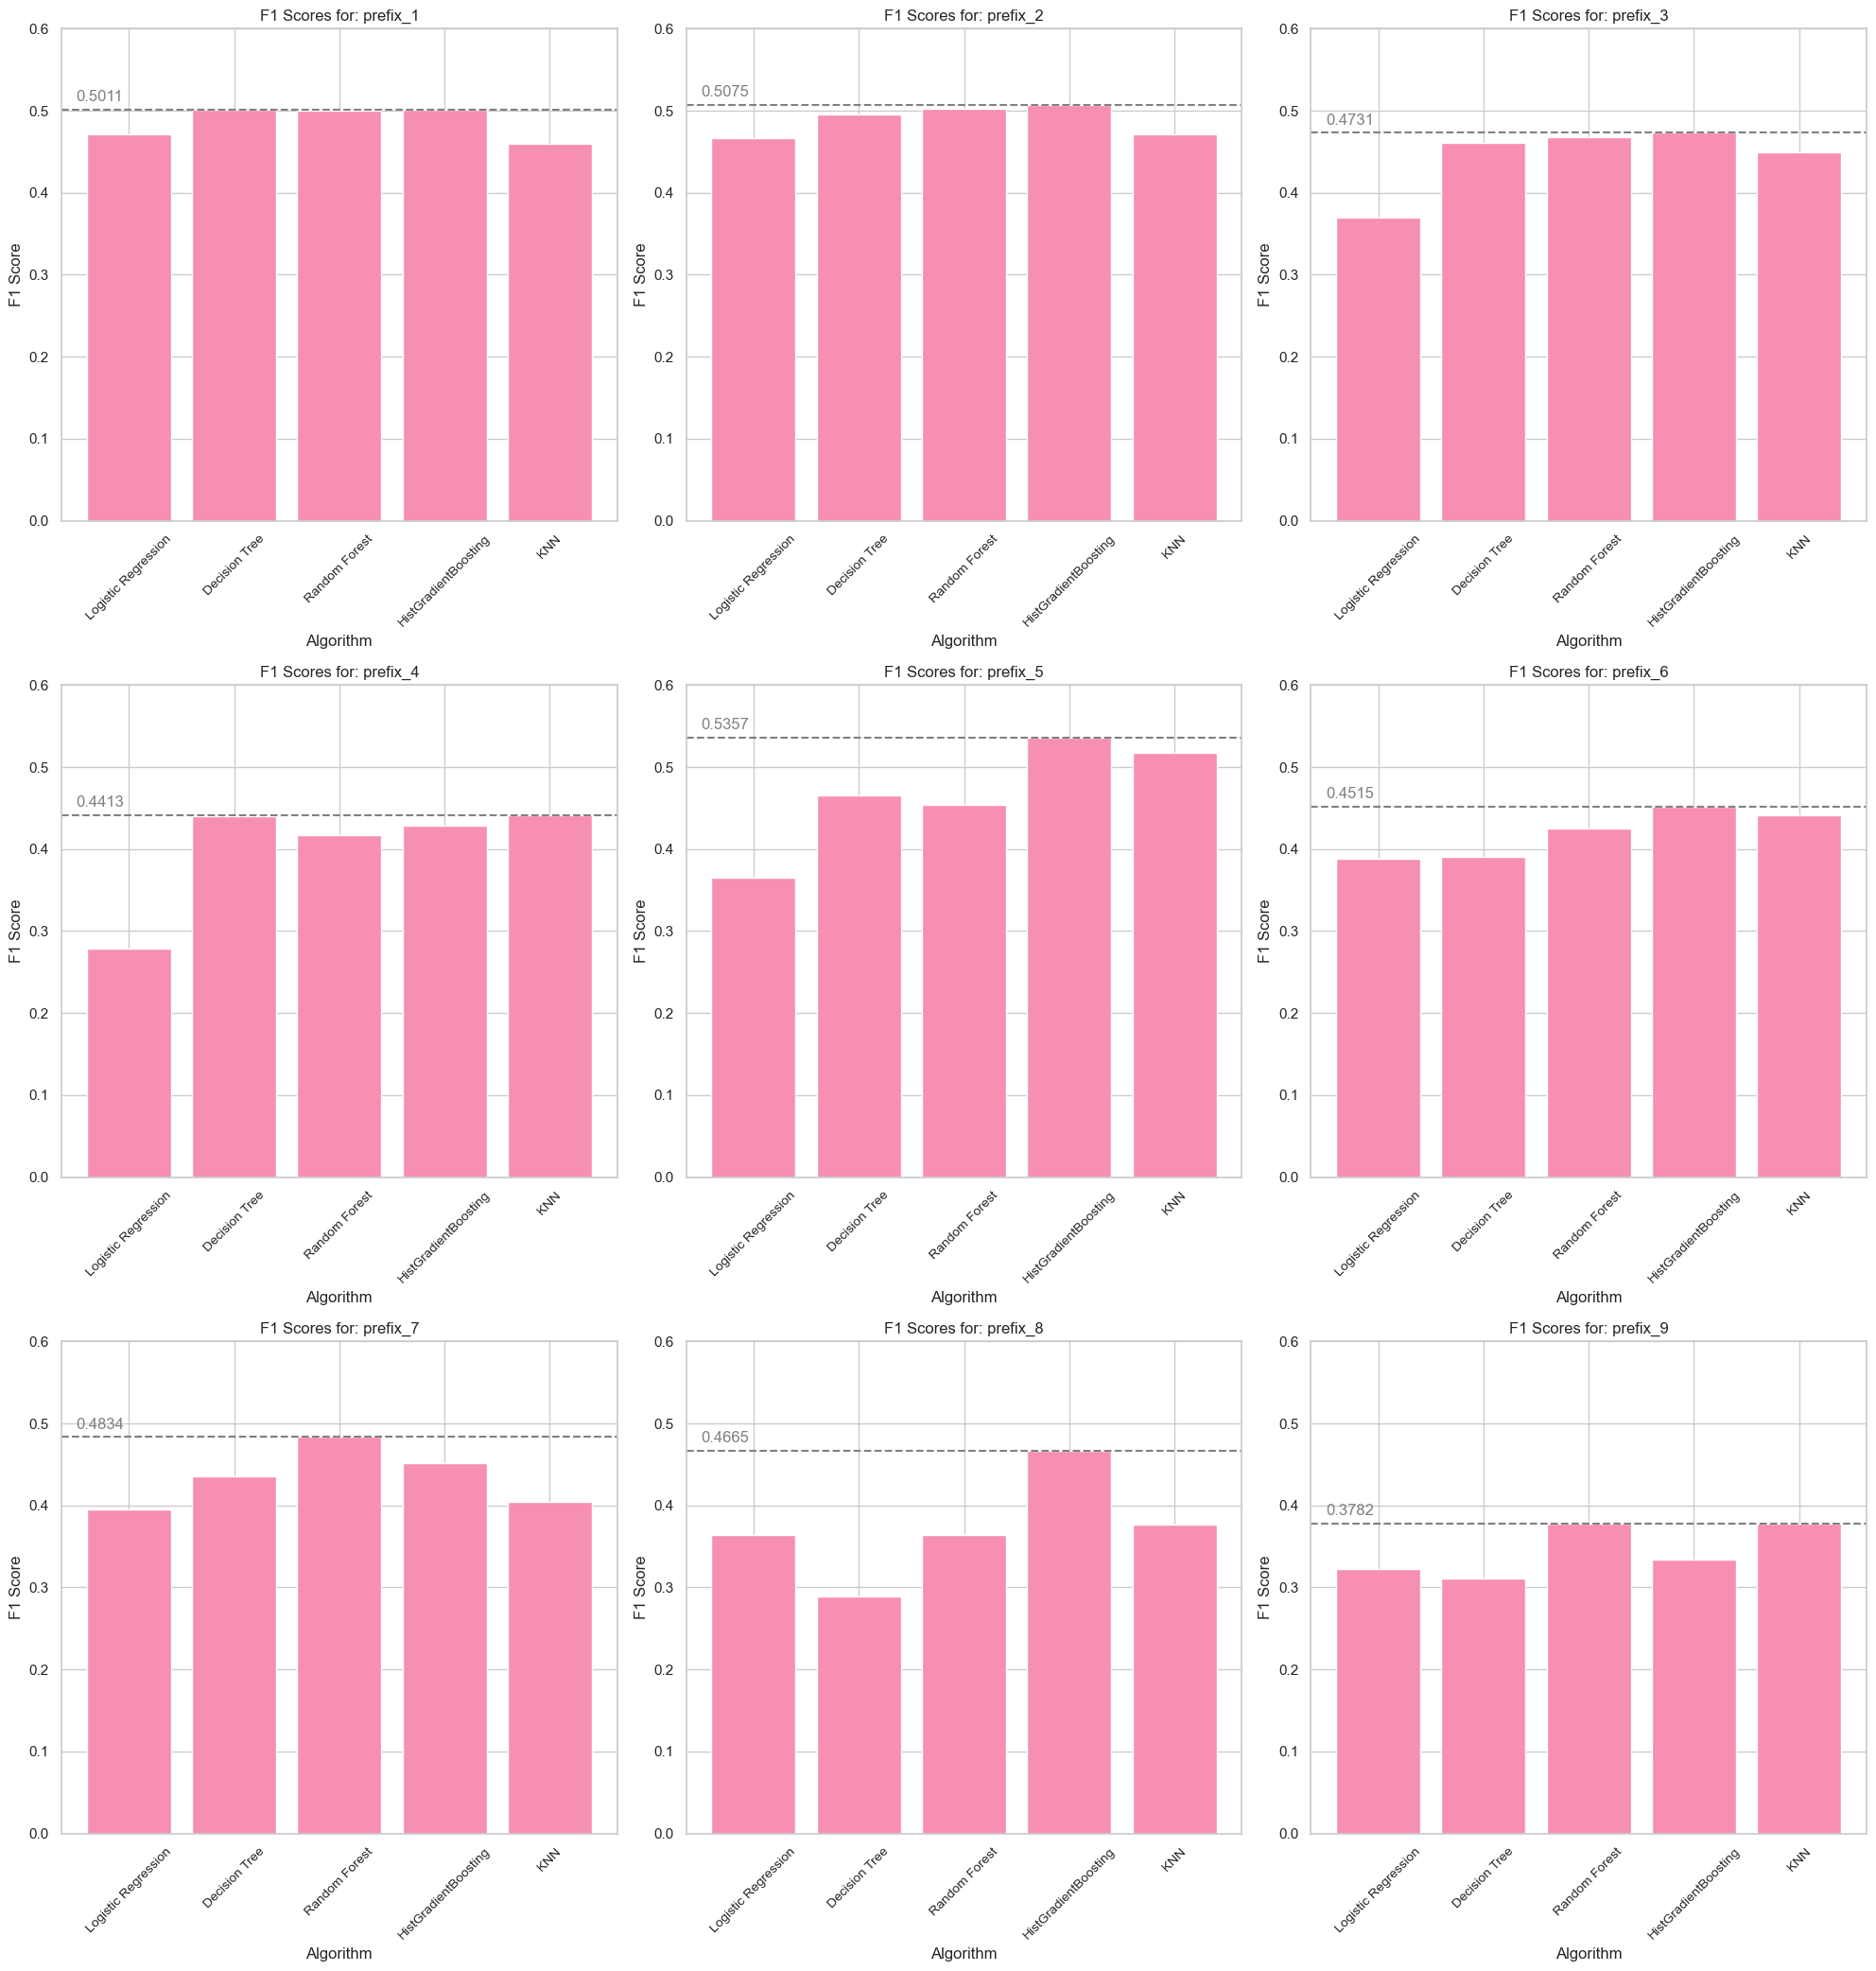

In [173]:
# Function to visualize F1 scores for each prefix

def visualize_f1_scores(final_results):
    # calculate the number of rows needed for subplots
    num_rows = len(final_results) // 3
    if len(final_results) % 3 != 0:
        num_rows += 1

    fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 7))

    # flatten axes array -> easy iteration
    axs = axs.flatten()

    # iterate over each prefix and its results
    for idx, (prefix, results) in enumerate(final_results.items()):
        # extract F1 scores for each algorithm
        algorithms = list(results.keys())
        f1_scores = [results[algo]['f1'] for algo in algorithms]

        # create a bar plot for F1 scores
        ax = axs[idx]
        ax.bar(algorithms, f1_scores, color='#f78fb3')
        ax.set_title(f"F1 Scores for: {prefix}")
        ax.set_xlabel("Algorithm")
        ax.set_ylabel("F1 Score")
        ax.set_ylim(0.0, 0.6) 

        # rotate x-axis labels -> better readability
        ax.tick_params(axis='x', rotation=45)

        # set smaller font size for x-axis labels
        ax.tick_params(axis='x', labelsize=10)

        # add a dashed line at the height of the highest bar
        max_idx = np.argmax(f1_scores)
        max_value = f1_scores[max_idx]
        ax.axhline(y=max_value, color='gray', linestyle='--')

        # annotate the value of the highest F1 score on the y-axis
        ax.text(-0.5, max_value + 0.01, f'{max_value:.4f}', color='grey')

    # remove empty subplots if any
    for i in range(len(final_results), num_rows * 3):
        fig.delaxes(axs[i])

    plt.tight_layout()
    # display the plots
    plt.show()

# visualize F1 scores for each prefix
visualize_f1_scores(final_results)

In [174]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

def auxiliar(train_data, val_data, y_train_dict, y_val_dict, best_params):
    
    results = {prefix: {} for prefix in train_data}
    predictions = {prefix: {} for prefix in train_data}

    for prefix in train_data:
        x_train = train_data[prefix]
        y_train = y_train_dict[prefix]
        x_val = val_data[prefix]
        y_val = y_val_dict[prefix]

        prefix_best_params = best_params[prefix]

        for model_name, params in prefix_best_params.items():
            model = param_grids[model_name][0]
            model.set_params(**params)
            model.fit(x_train, y_train)
            y_t_pred = model.predict(x_train)
            y_pred = model.predict(x_val)
            

            f1t = round(f1_score(y_train, y_t_pred, average='weighted'),4)
            f1 = round(f1_score(y_val, y_pred, average='weighted'),4)
            
            predictions[prefix][model_name] = y_pred
            results[prefix][model_name] = {
                'f1 train': f1t,
                'f1 validation': f1
            }
            
#             print(f"{model_name} with best params for {prefix} evaluated.")

    return results, predictions  

overfitting_results = auxiliar(filtered_datasets_train, filtered_datasets_val, y_train_dict, y_val_dict, best_params)

In [175]:
overfitting_results[0]

{'prefix_1': {'Logistic Regression': {'f1 train': 0.4634,
   'f1 validation': 0.4714},
  'Decision Tree': {'f1 train': 0.4953, 'f1 validation': 0.5011},
  'Random Forest': {'f1 train': 0.4951, 'f1 validation': 0.4999},
  'HistGradientBoosting': {'f1 train': 0.4954, 'f1 validation': 0.501},
  'KNN': {'f1 train': 0.4583, 'f1 validation': 0.4592}},
 'prefix_2': {'Logistic Regression': {'f1 train': 0.4607,
   'f1 validation': 0.4668},
  'Decision Tree': {'f1 train': 0.5136, 'f1 validation': 0.4956},
  'Random Forest': {'f1 train': 0.5221, 'f1 validation': 0.5023},
  'HistGradientBoosting': {'f1 train': 0.5229, 'f1 validation': 0.5075},
  'KNN': {'f1 train': 0.5299, 'f1 validation': 0.4714}},
 'prefix_3': {'Logistic Regression': {'f1 train': 0.3891,
   'f1 validation': 0.3693},
  'Decision Tree': {'f1 train': 0.511, 'f1 validation': 0.4604},
  'Random Forest': {'f1 train': 0.5332, 'f1 validation': 0.4673},
  'HistGradientBoosting': {'f1 train': 0.6024, 'f1 validation': 0.4731},
  'KNN': {'f

In [176]:
def plot_activity_predictions(x_val_dict, y_val_dict, y_pred_dict, models_to_plot):
    activity_values = ['100', '102.0', '105.0']  # Specific activity values
    outcomes = [0, 1, 2, 3]  # Possible outcomes

    for activity in activity_values:
        fig, ax = plt.subplots(figsize=(10, 6))
        width = 0.15  # Width of the bars, smaller to fit grouped bars
        indices = np.arange(len(outcomes))  # Indices for the x-axis

        actual_counts = np.zeros(len(outcomes))  # Initialize counts for actual outcomes
        pred_counts = np.zeros(len(outcomes))  # Initialize counts for predicted outcomes
        print(activity)
        # Process each dataset by prefix
        for prefix in x_val_dict:
            data = x_val_dict[prefix].copy()
            data['Actual_Outcome'] = y_val_dict[prefix].values
            data['Predicted_Outcome'] = y_pred_dict[prefix][models_to_plot[prefix]]

            # Find the last 'Activity_' column and filter based on activity
            activity_column = [col for col in data.columns if col.startswith('Actvity ID_')][-1]
            filtered_data = data[data[activity_column] == activity]

            for outcome in outcomes:
                actual_counts[outcome] += (filtered_data['Actual_Outcome'] == outcome).sum()
                pred_counts[outcome] += (filtered_data['Predicted_Outcome'] == outcome).sum()


        print(f"Actual counts for activity {activity}: {actual_counts}")
        print(f"Predicted counts for activity {activity}: {pred_counts}")
        # Plot actual outcomes as a bar
        ax.bar(indices - width/2, actual_counts, width, label='Actual Outcomes', color='#f78fb3')
        # Plot predicted outcomes as a bar next to actual
        ax.bar(indices + width/2, pred_counts, width, label='Predicted Outcomes', alpha=0.8, color='red')

        # Setup the plot with labels and titles
        ax.set_xlabel('Outcome')
        ax.set_ylabel('Counts')
        ax.set_title(f'Grouped Bar Plot of Actual vs. Predicted Outcomes for Activity {activity}')
        ax.set_xticks(indices)
        ax.set_xticklabels(['Request Finished', 'Request Canceled', 'Others', 'Closed Administratively'])
        ax.legend()

        plt.show()

In [177]:
models_to_plot = {
    'prefix_1': 'Decision Tree',
    'prefix_2': 'HistGradientBoosting',
    'prefix_3': 'HistGradientBoosting',
    'prefix_4': 'KNN',
    'prefix_5': 'HistGradientBoosting',
    'prefix_6': 'HistGradientBoosting',
    'prefix_7': 'Random Forest',
    'prefix_8': 'HistGradientBoosting',
    'prefix_9': 'Random Forest'
    
}

100
Actual counts for activity 100: [2702.  572. 5896. 4517.]
Predicted counts for activity 100: [ 729.    0. 7278. 5680.]


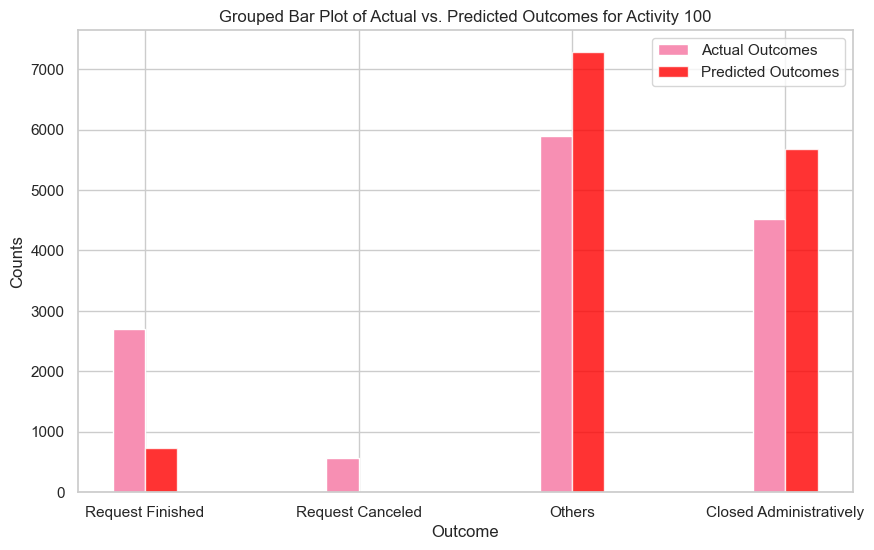

102.0
Actual counts for activity 102.0: [ 843.  169.  665. 1308.]
Predicted counts for activity 102.0: [ 555.   43.  595. 1792.]


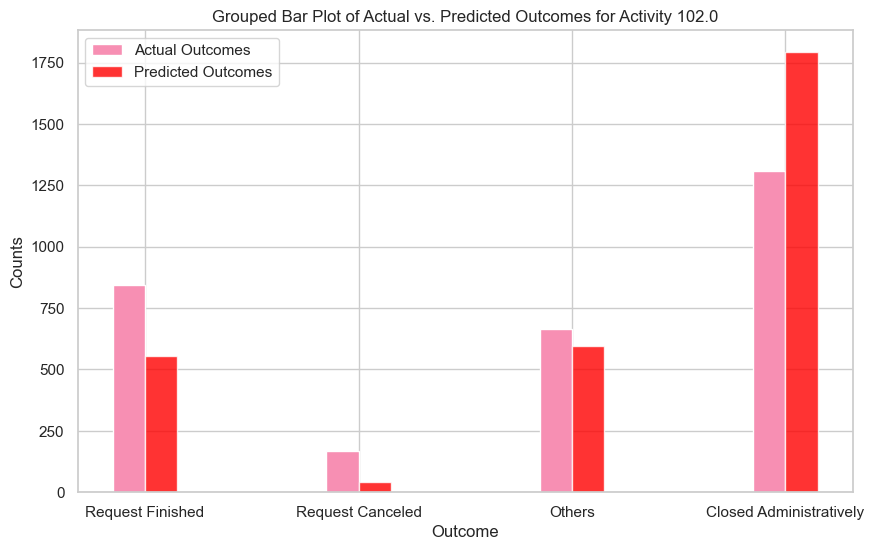

105.0
Actual counts for activity 105.0: [18. 14.  0. 33.]
Predicted counts for activity 105.0: [ 7.  1. 28. 29.]


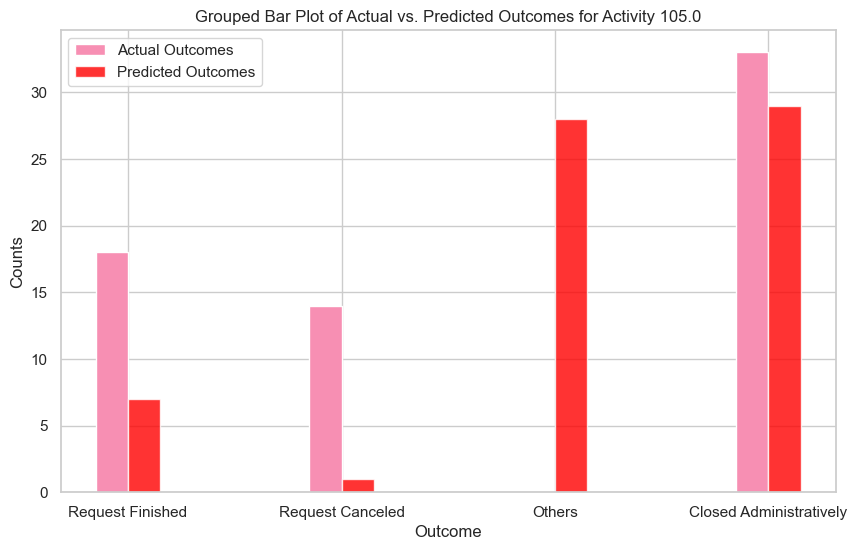

In [178]:
plot_activity_predictions(X_val_dict, y_val_dict, overfitting_results[1], models_to_plot)